In [108]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
df=pd.read_csv("loan_data.csv")

In [111]:
df.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0
1,1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1
2,2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0
3,3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0
4,4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0


In [112]:
df.tail()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
7495,7495,Rent,402192.0,< 1 year,0,3,8.5,107866,0,NaN,0.0,other,Short Term,129360,73492,1900,697.0,0
7496,7496,Home Mortgage,1533984.0,1 year,0,10,26.5,686312,0,43.0,0.0,debt consolidation,Long Term,444048,456399,12783,7410.0,1
7497,7497,Rent,1878910.0,6 years,0,12,32.1,1778920,0,NaN,0.0,buy a car,Short Term,99999999,477812,12479,748.0,0
7498,7498,Home Mortgage,NaN,NaN,0,21,26.5,1141250,0,NaN,0.0,debt consolidation,Short Term,615274,476064,37118,NaN,0
7499,7499,Rent,NaN,4 years,0,8,9.4,480832,0,NaN,0.0,debt consolidation,Short Term,26928,288192,9061,NaN,0


In [113]:
df=df.drop("Id",axis=1)

In [114]:
df.shape

(7500, 17)

In [115]:
df.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default'],
      dtype='object')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   int64  
 4   Number of Open Accounts       7500 non-null   int64  
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   int64  
 7   Number of Credit Problems     7500 non-null   int64  
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   int64  
 13  Cur

In [117]:
df.duplicated().sum()

np.int64(0)

In [118]:
df.isnull().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [119]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [120]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], dtype='object')

Numerical type columns:
Index(['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default'],
      dtype='object')


In [121]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []
    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 40:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [122]:
categorical, non_categorical, discrete, continuous = classify_features(df)
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Home Ownership', 'Years in current job', 'Purpose', 'Term']
Non-Categorical Features: []
Discrete Features: ['Tax Liens', 'Number of Credit Problems', 'Bankruptcies', 'Credit Default']
Continuous Features: ['Annual Income', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Months since last delinquent', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']


In [123]:
df = df.drop('Months since last delinquent', axis =1)

In [124]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['Years in current job']] = cat_imputer.fit_transform(df[['Years in current job']])

In [125]:
df = df.dropna()

In [126]:
df.isnull().sum()

Home Ownership               0
Annual Income                0
Years in current job         0
Tax Liens                    0
Number of Open Accounts      0
Years of Credit History      0
Maximum Open Credit          0
Number of Credit Problems    0
Bankruptcies                 0
Purpose                      0
Term                         0
Current Loan Amount          0
Current Credit Balance       0
Monthly Debt                 0
Credit Score                 0
Credit Default               0
dtype: int64

In [127]:
df.shape

(5931, 16)

In [128]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [129]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Home Ownership
Home Ownership
Home Mortgage    2896
Rent             2516
Own Home          511
Have Mortgage       8
Name: count, dtype: int64

Years in current job
Years in current job
10+ years    2154
2 years       558
3 years       490
< 1 year      442
5 years       396
1 year        395
4 years       370
6 years       350
7 years       308
8 years       279
9 years       189
Name: count, dtype: int64

Purpose
Purpose
debt consolidation      4725
other                    514
home improvements        316
business loan            105
buy a car                 77
medical bills             58
major purchase            30
take a trip               27
buy house                 26
small business            19
wedding                   12
moving                    10
educational expenses       7
vacation                   5
Name: count, dtype: int64

Term
Term
Short Term    4350
Long Term     1581
Name: count, dtype: int64



In [130]:
for i in non_categorical:
    print(i)
    print(df[i].value_counts())
    print()

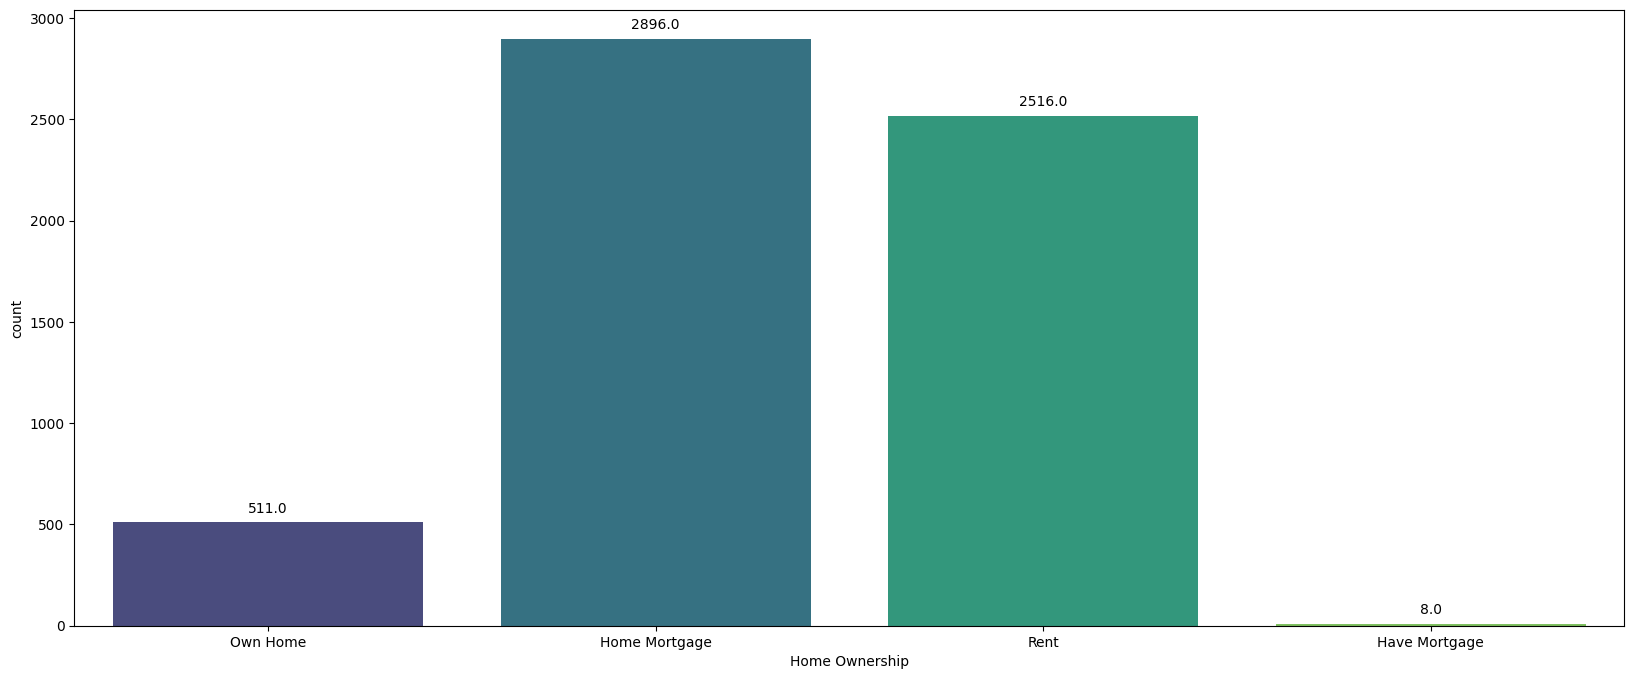

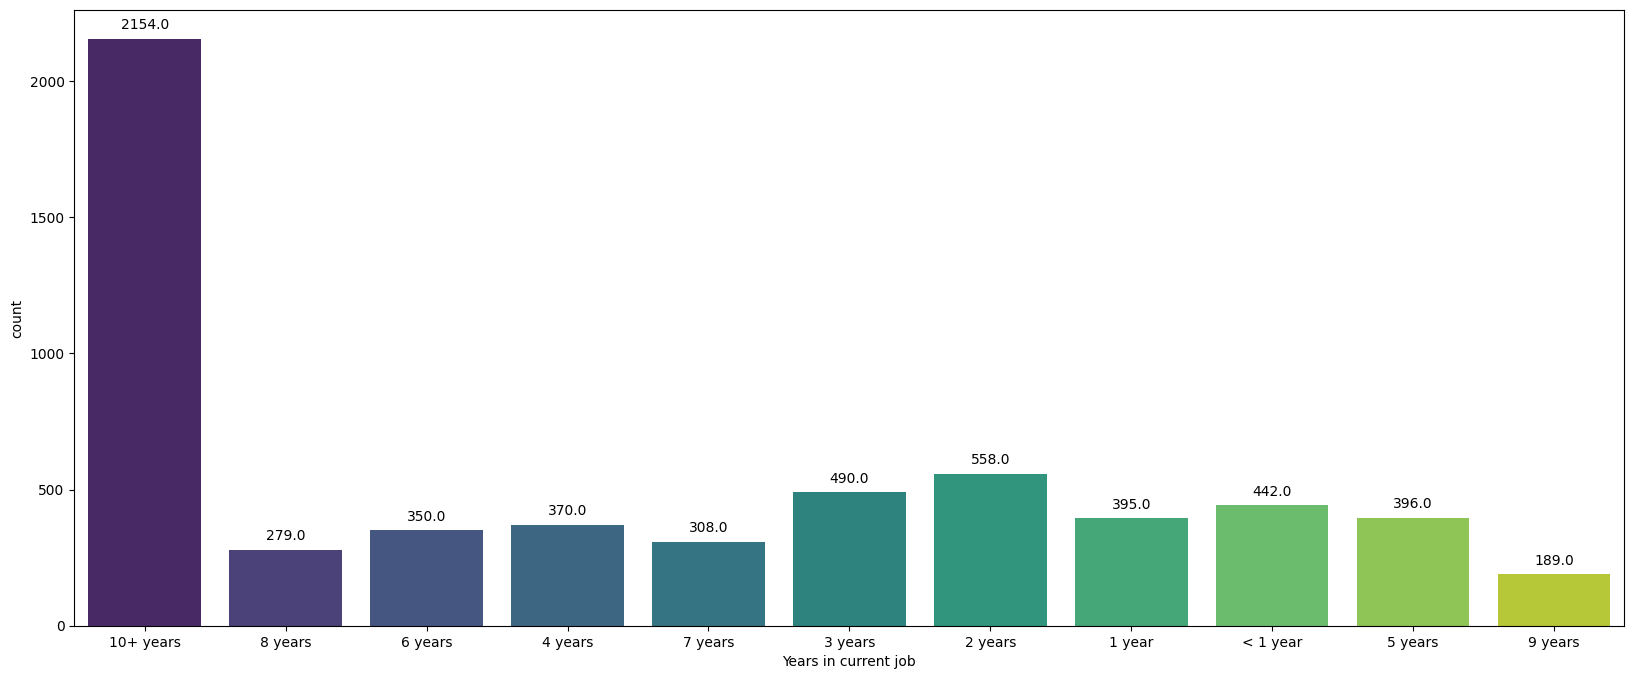

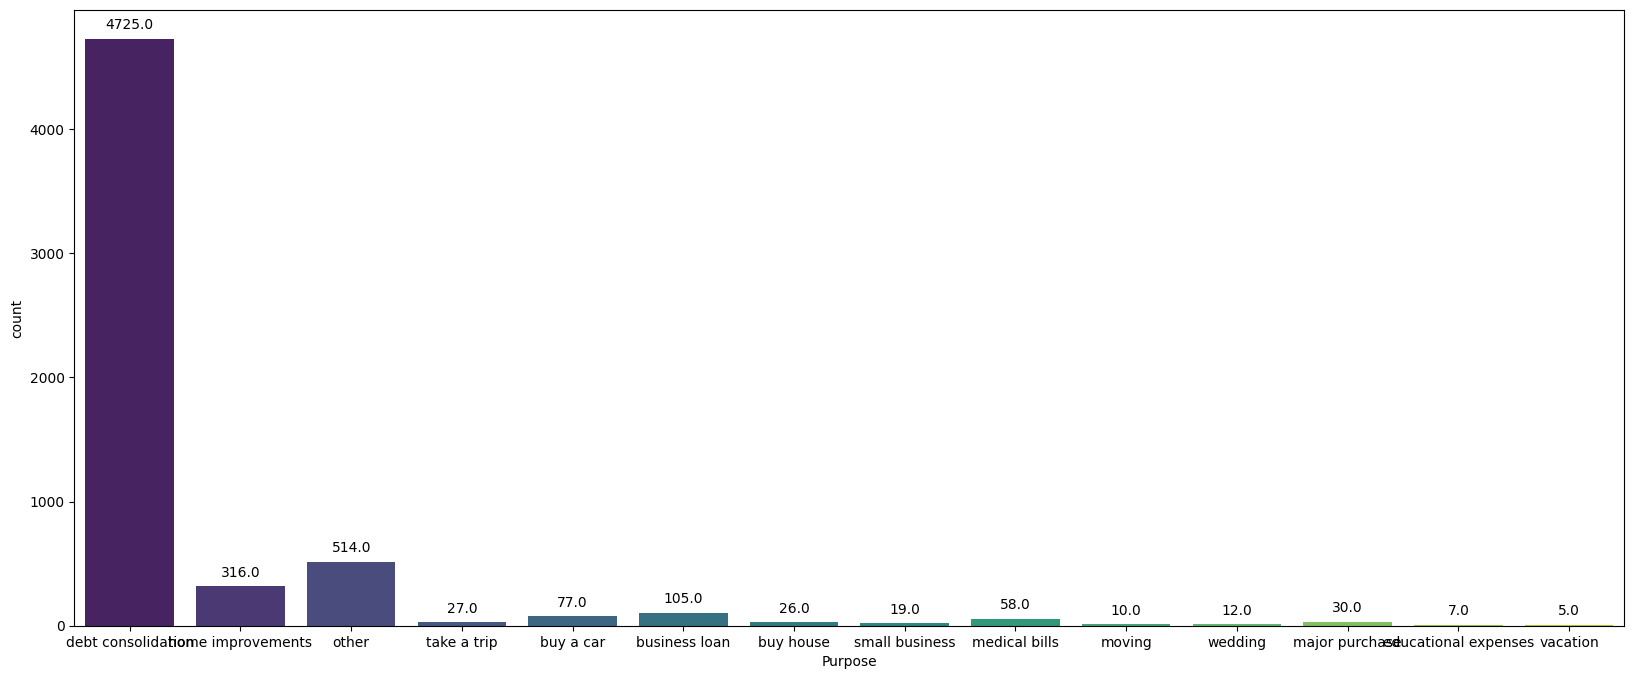

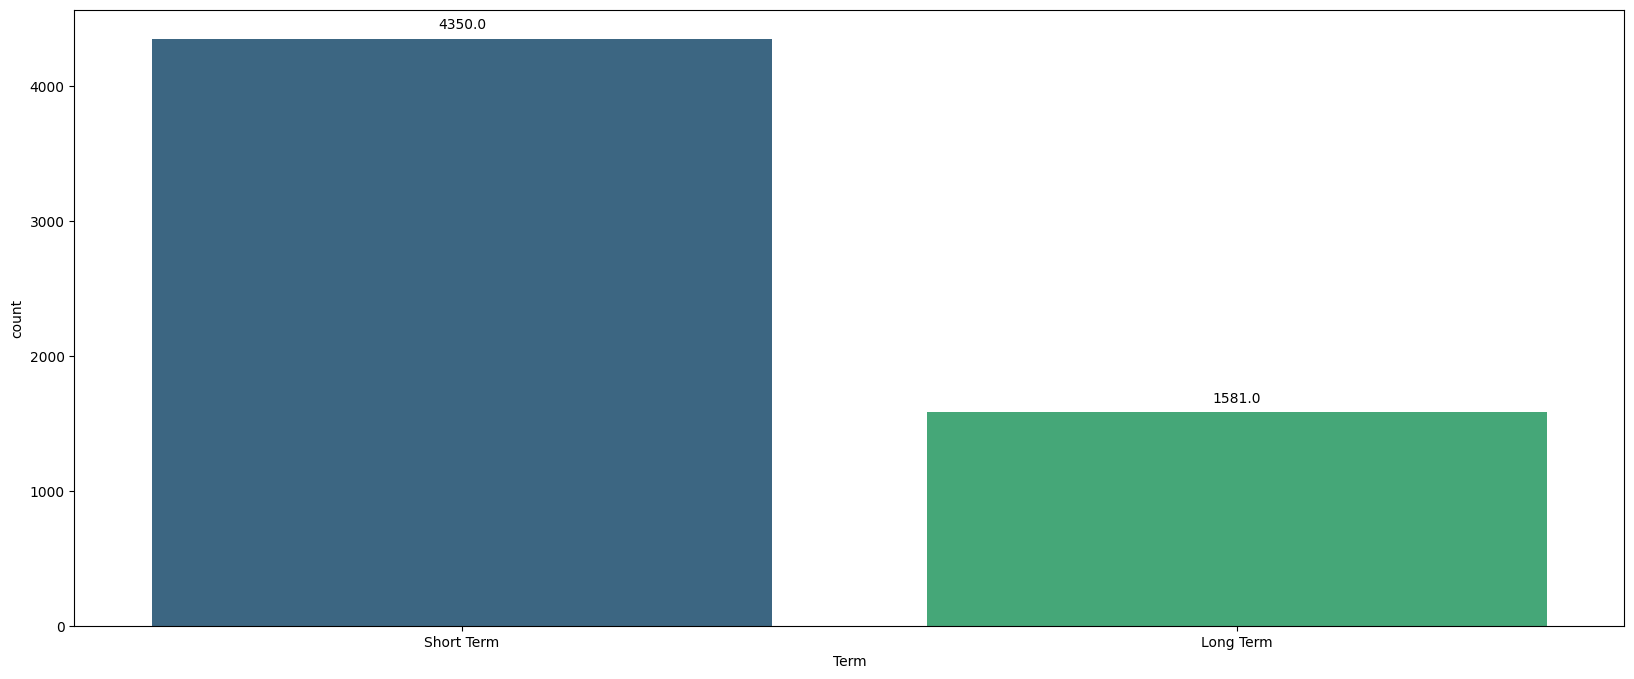

In [131]:
for i in categorical:
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(x=i, data=df, palette='viridis')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center') 
    plt.xticks(rotation = 0)
    plt.show()

In [132]:
import plotly.express as px
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [133]:
for i in discrete:
    print(i)
    print(df[i].value_counts())
    print()

Tax Liens
Tax Liens
0    5825
1      69
2      24
3       4
4       4
6       2
5       2
7       1
Name: count, dtype: int64

Number of Credit Problems
Number of Credit Problems
0    5115
1     696
2      80
3      24
4       6
5       5
6       4
7       1
Name: count, dtype: int64

Bankruptcies
Bankruptcies
0.0    5277
1.0     619
2.0      26
3.0       7
4.0       2
Name: count, dtype: int64

Credit Default
Credit Default
0    4351
1    1580
Name: count, dtype: int64



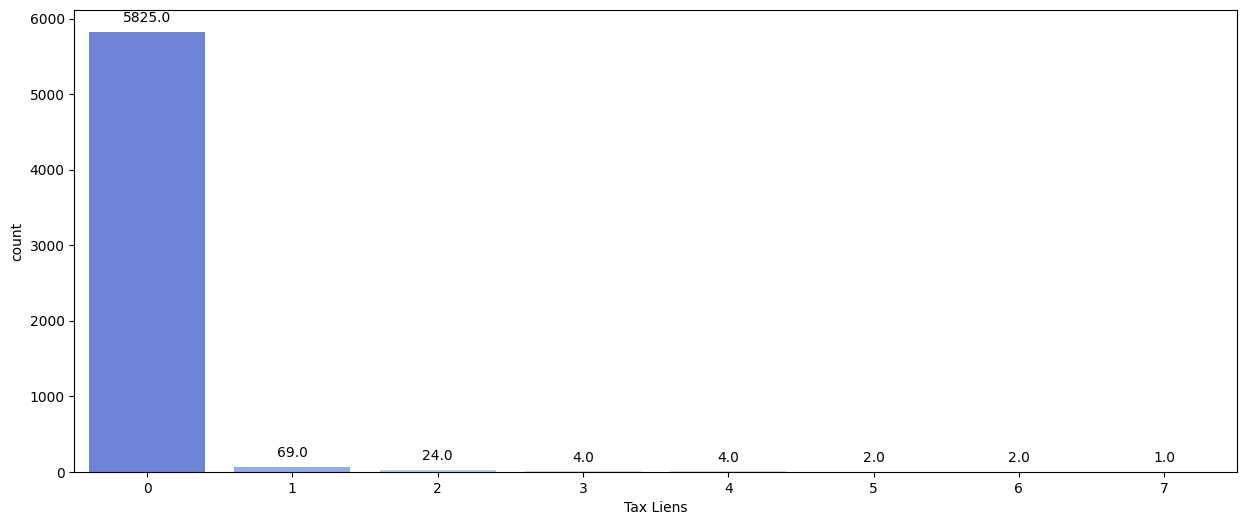

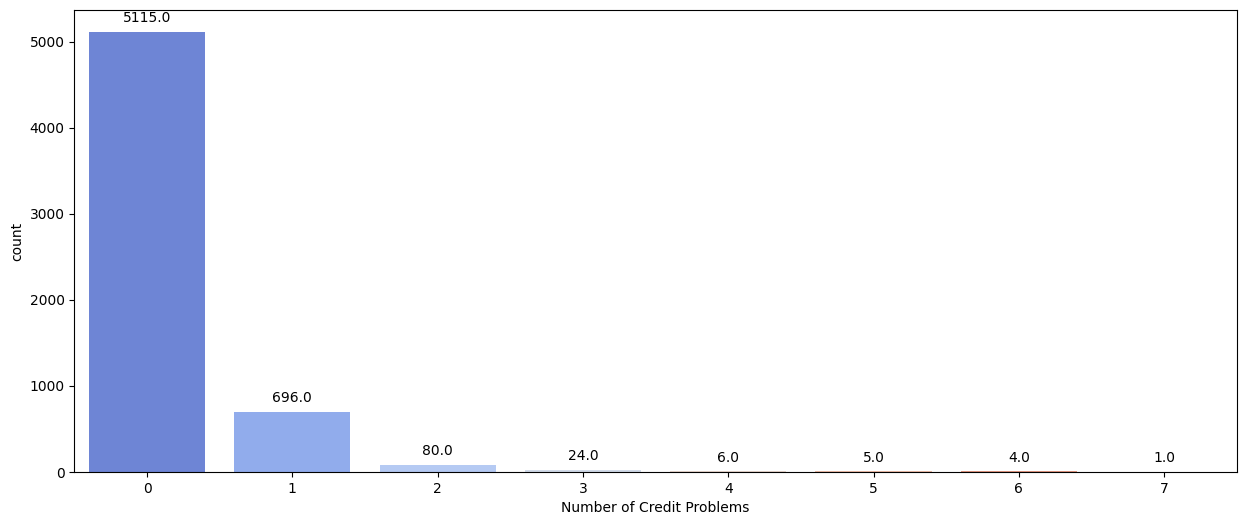

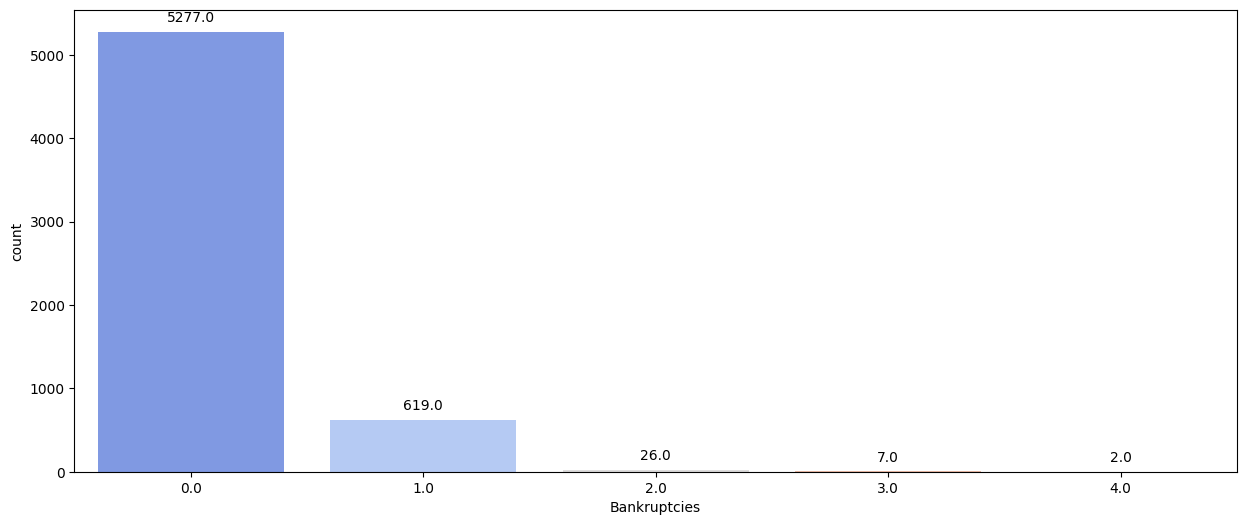

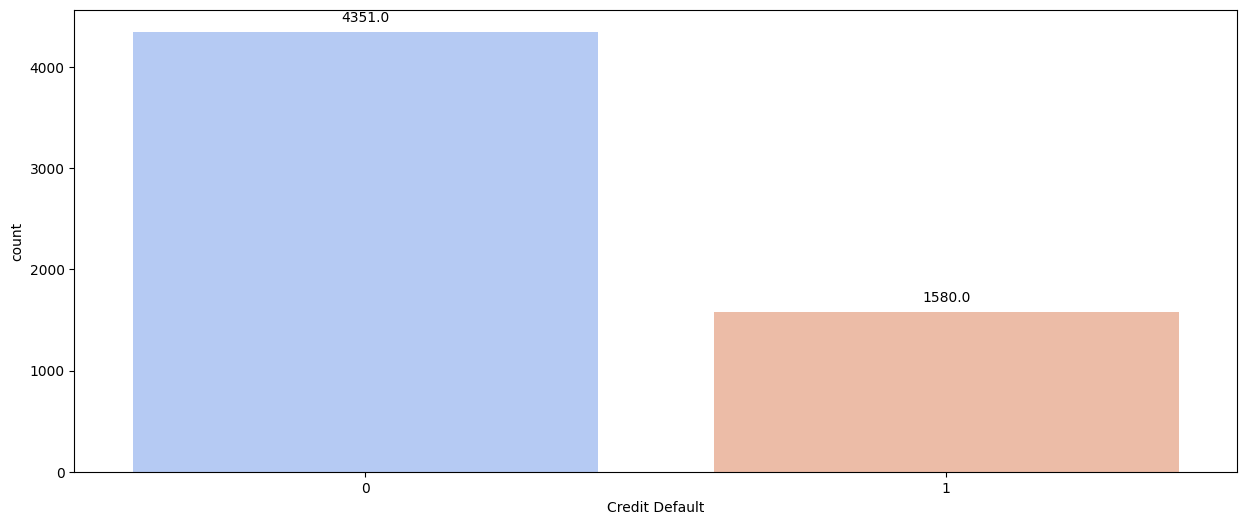

In [134]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='coolwarm')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')     
    plt.show()

In [135]:
for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

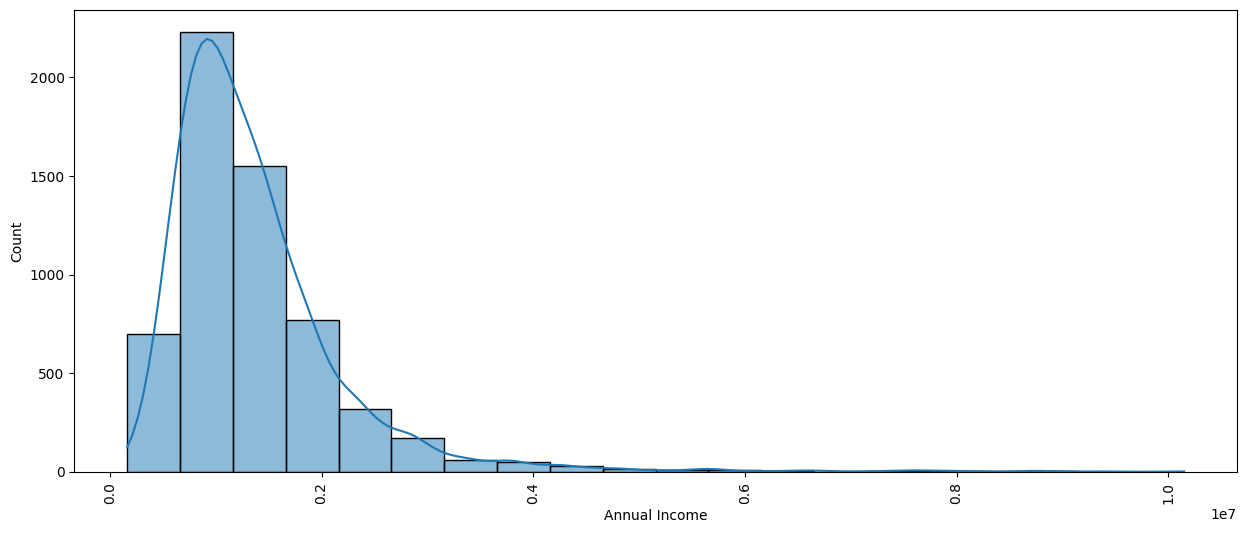

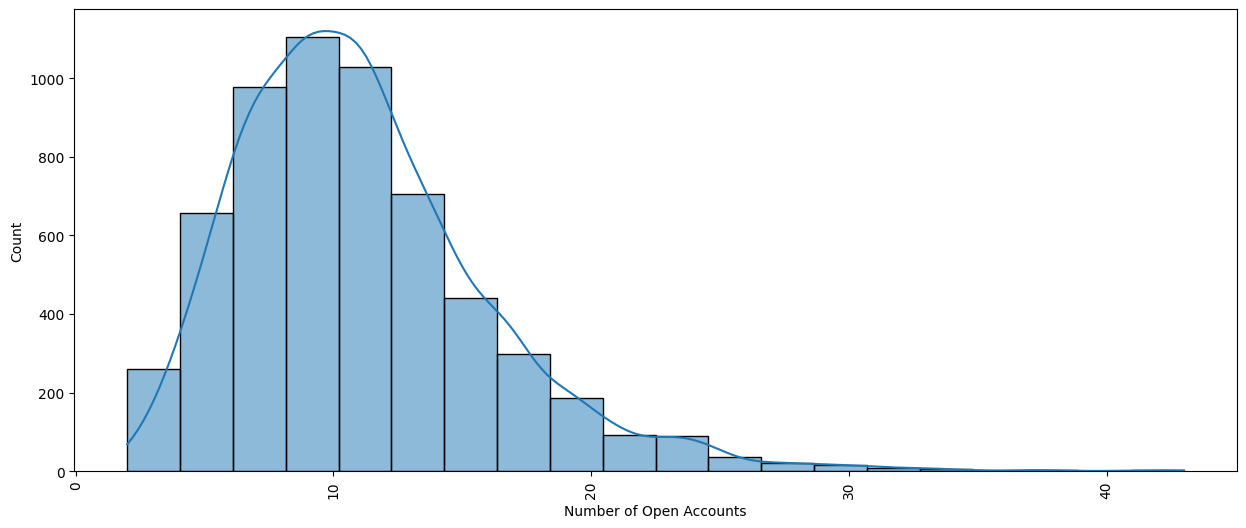

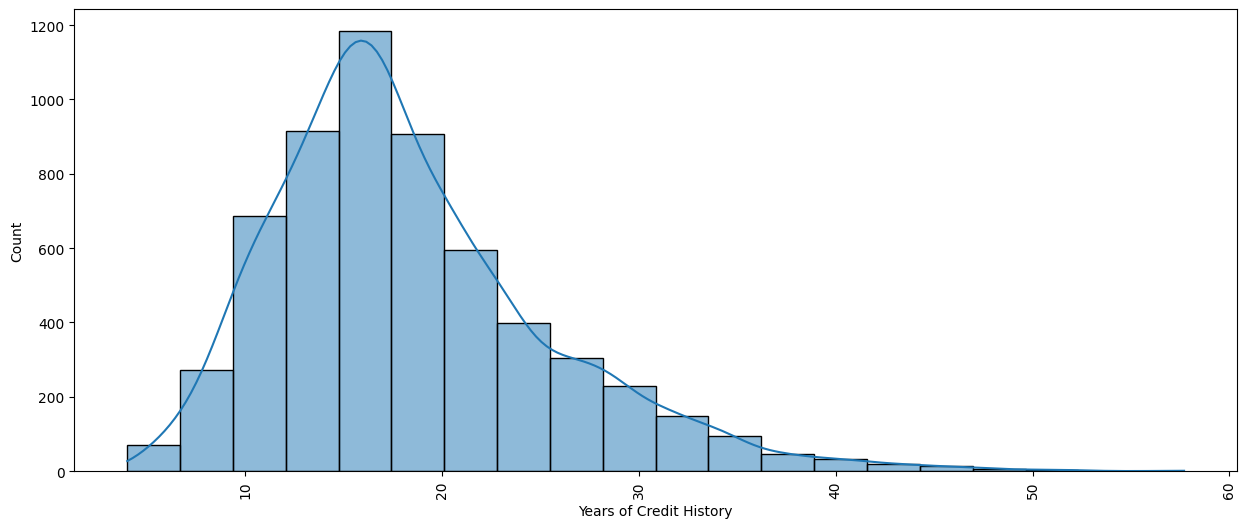

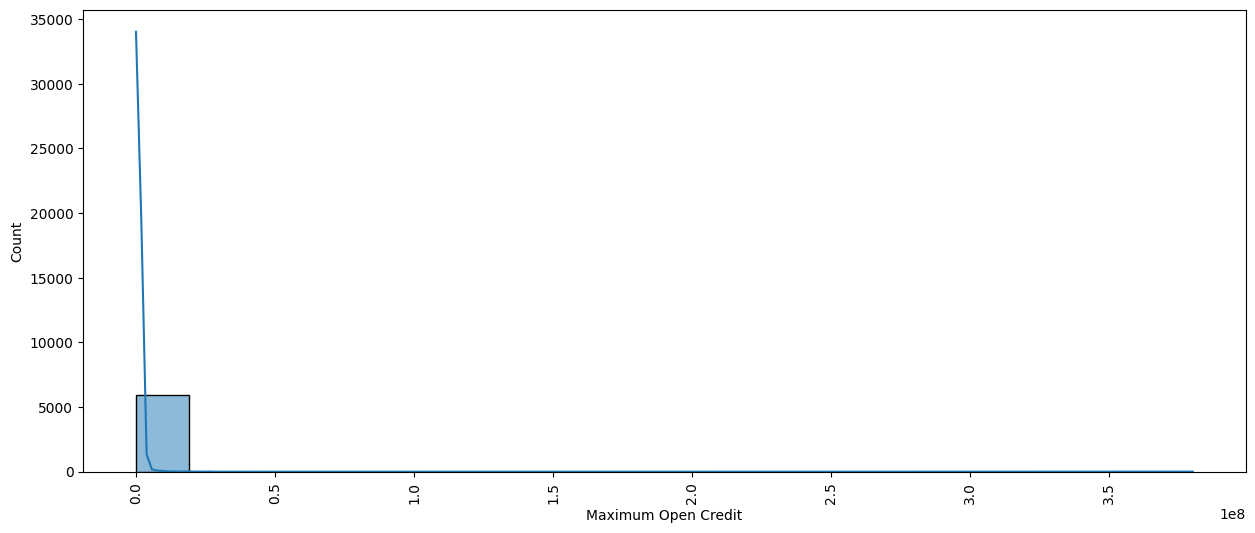

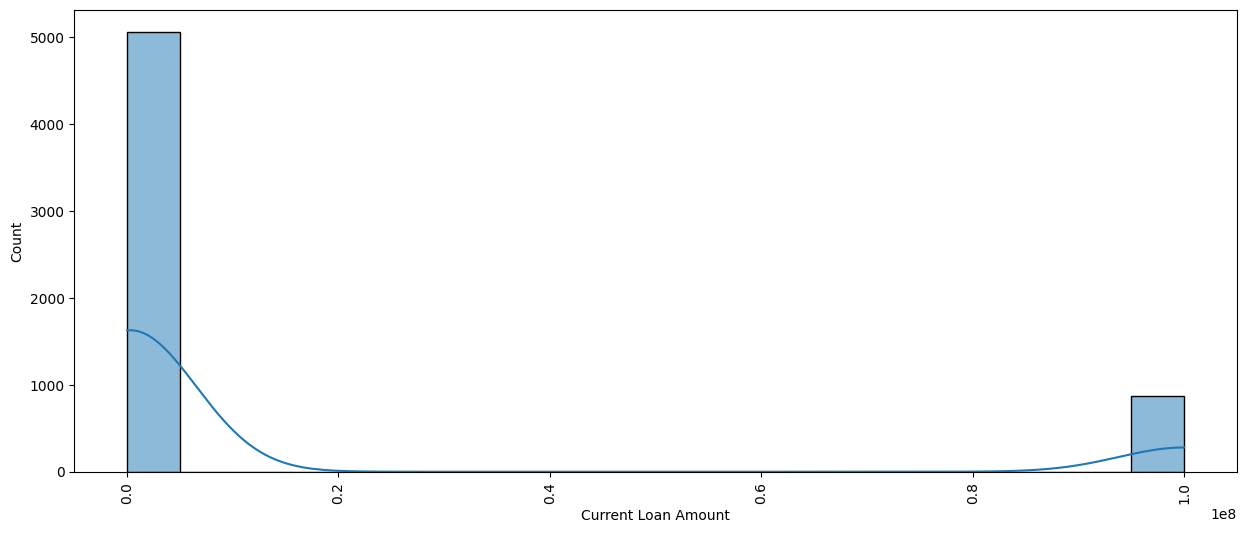

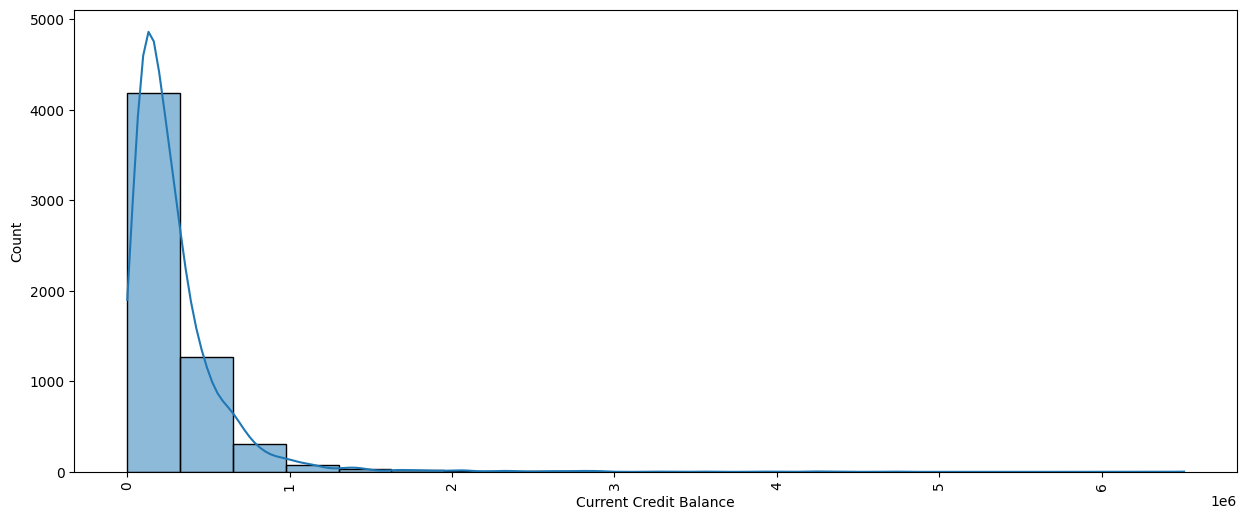

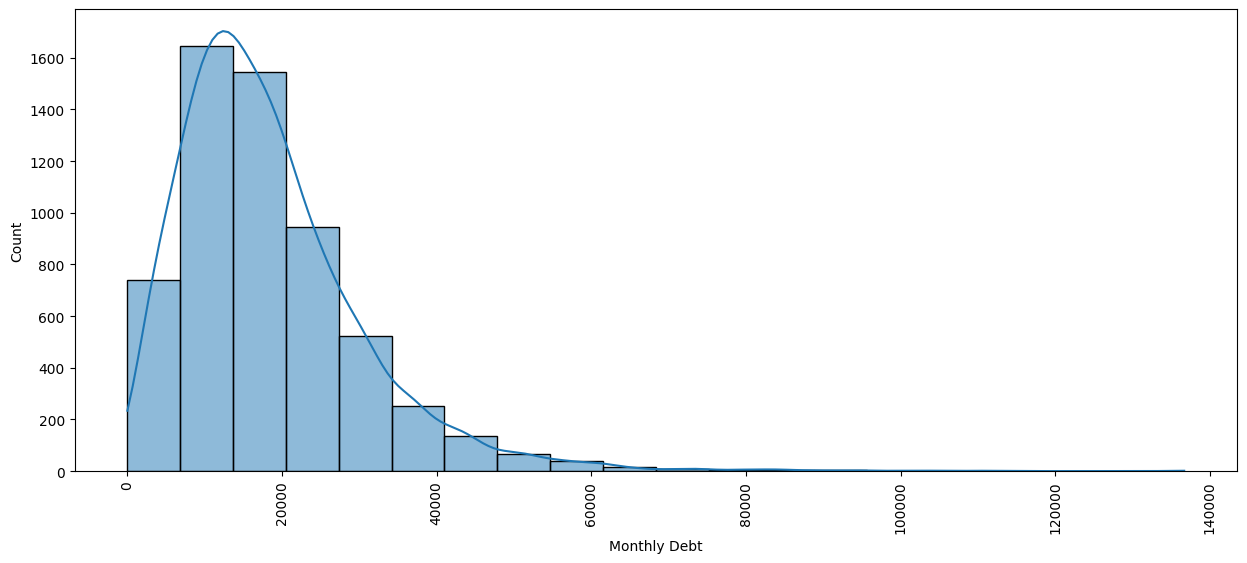

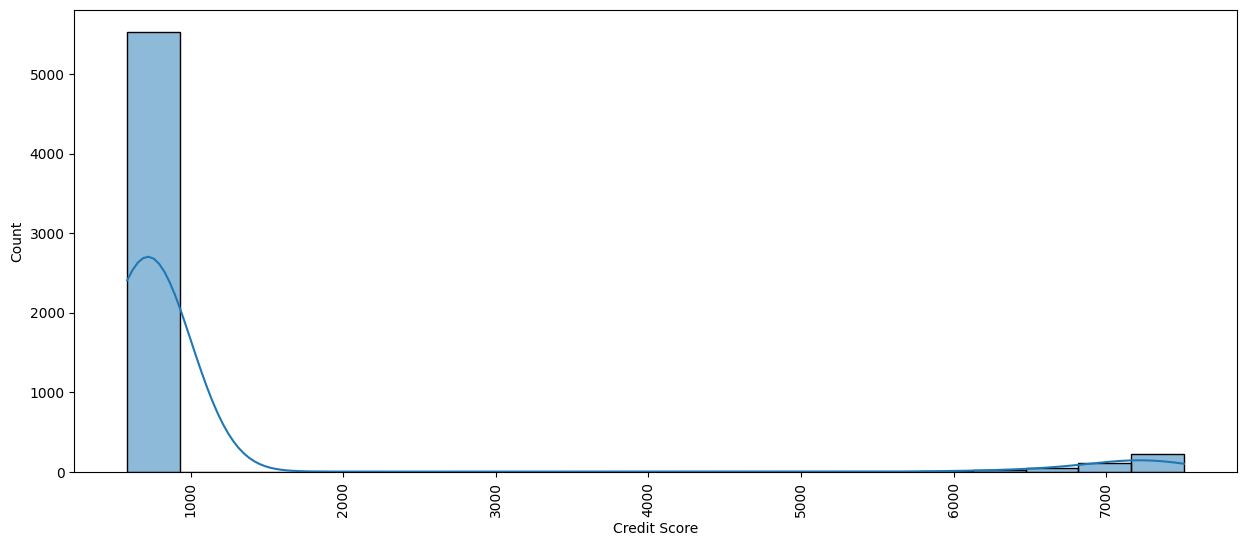

In [136]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

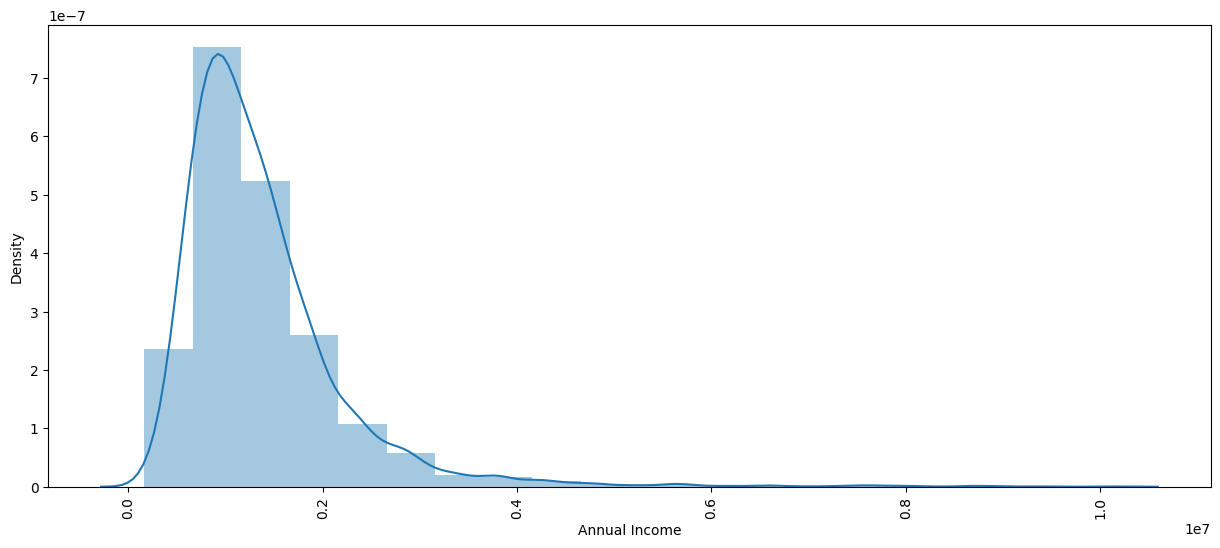

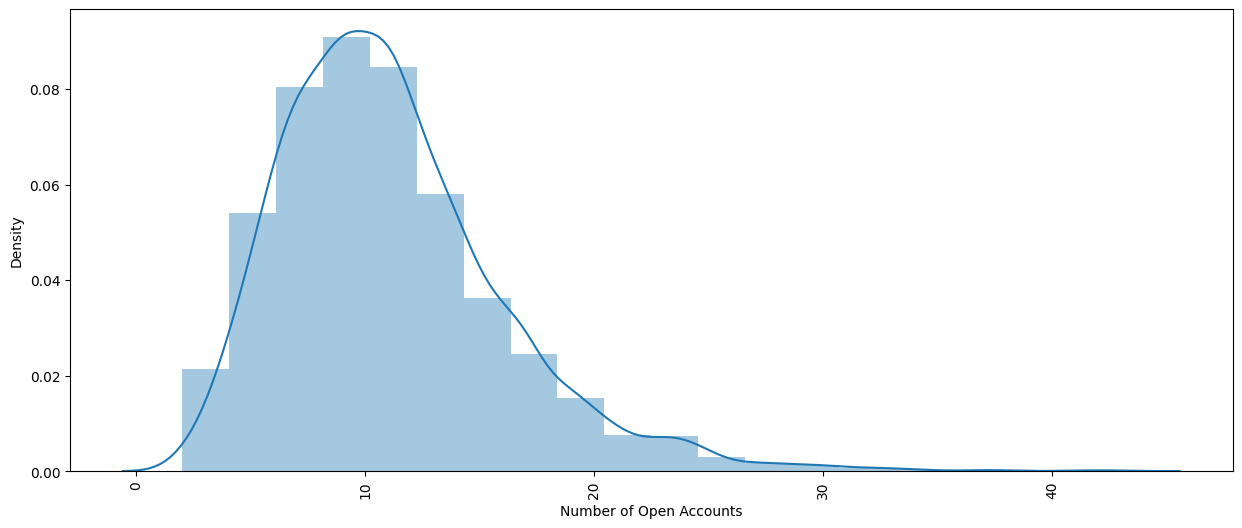

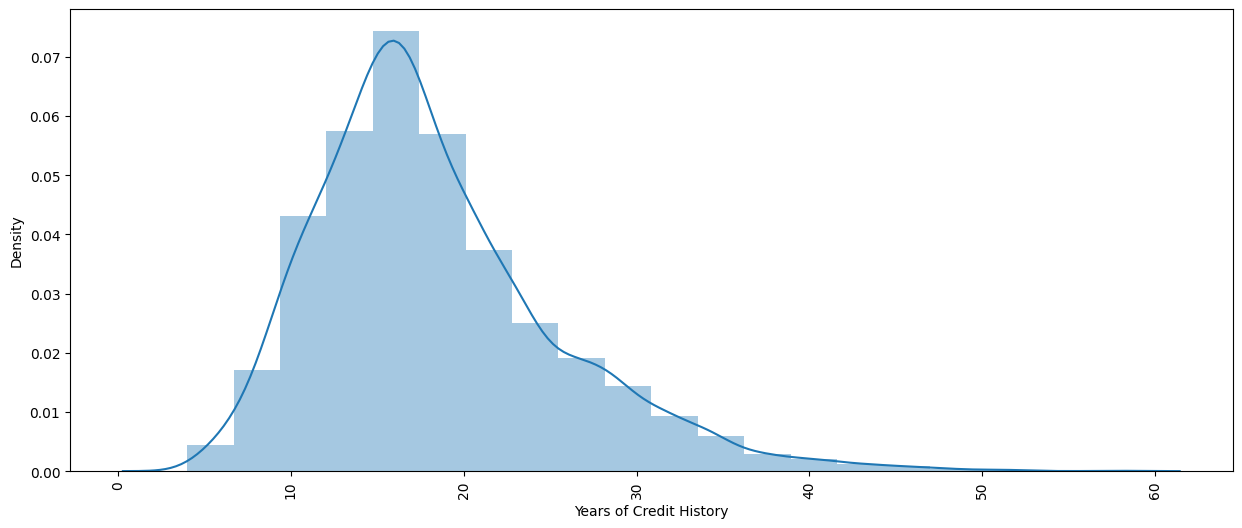

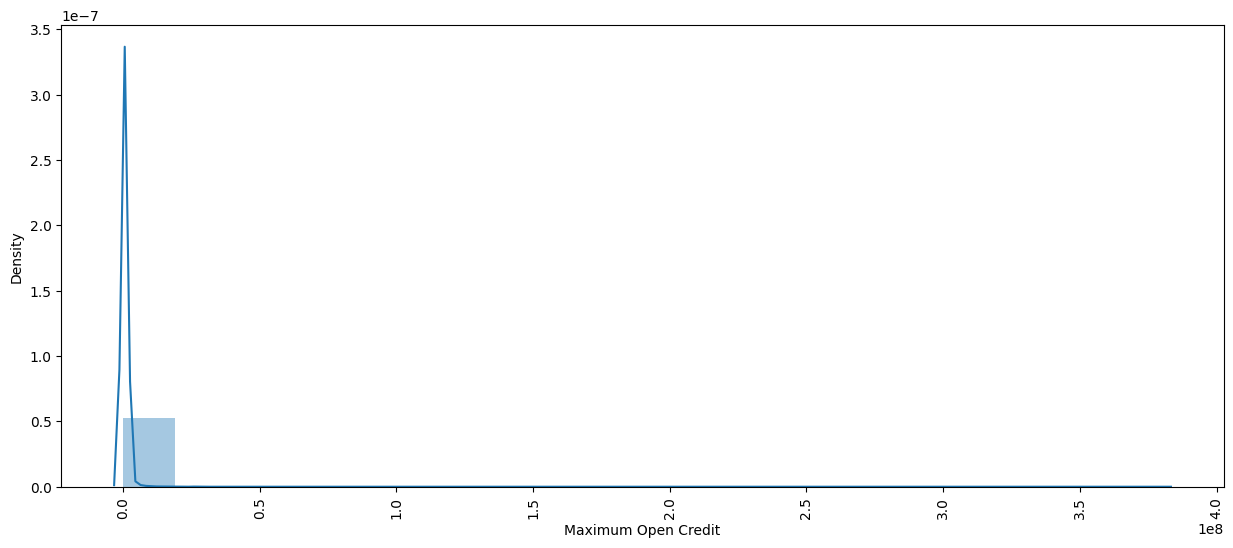

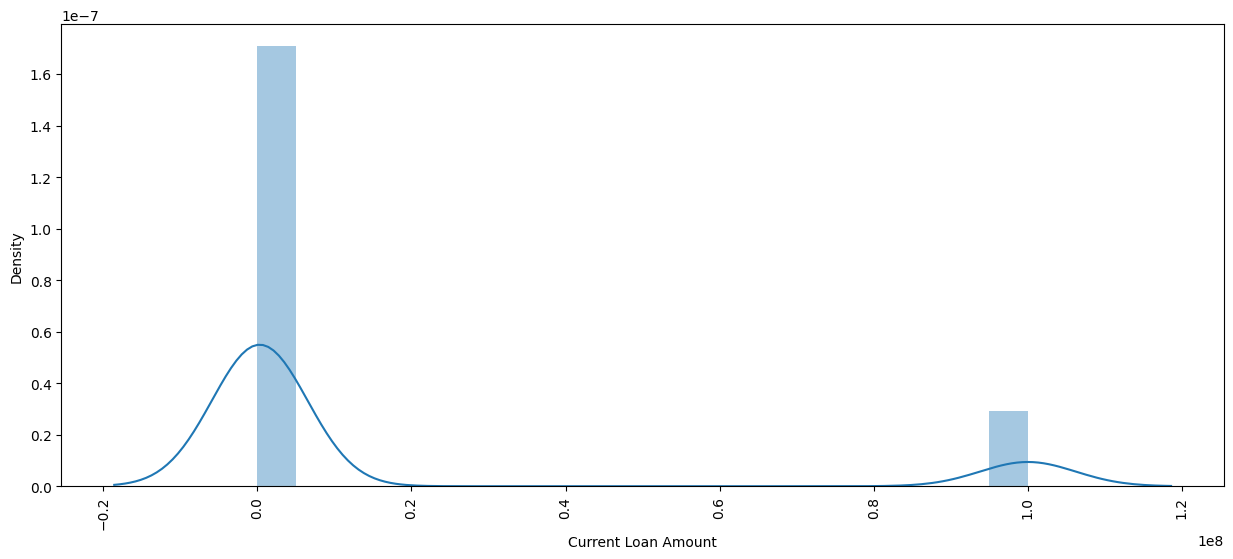

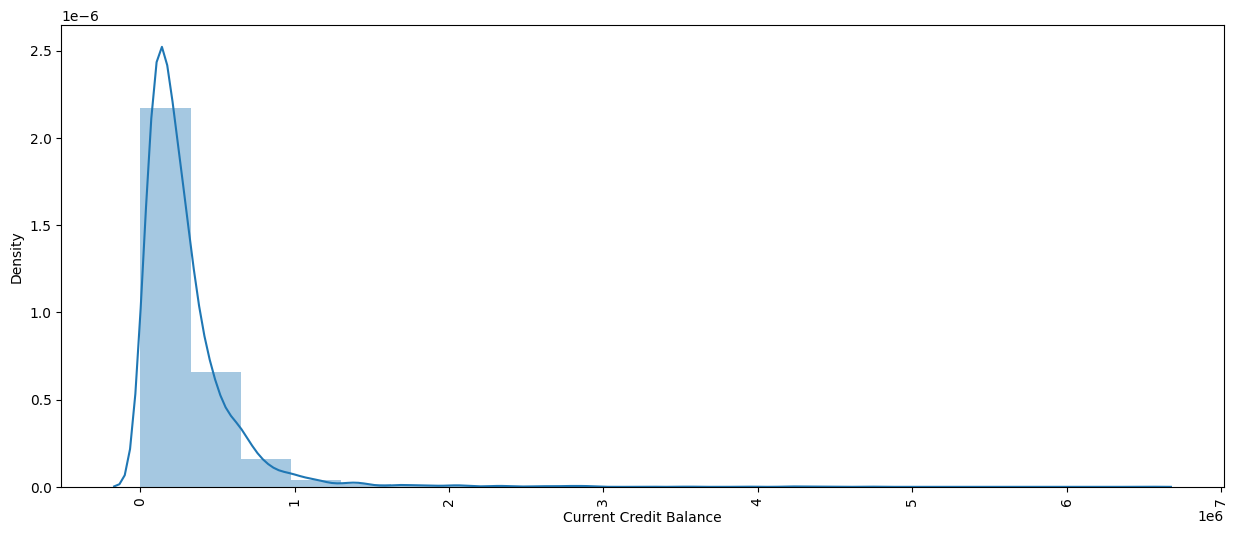

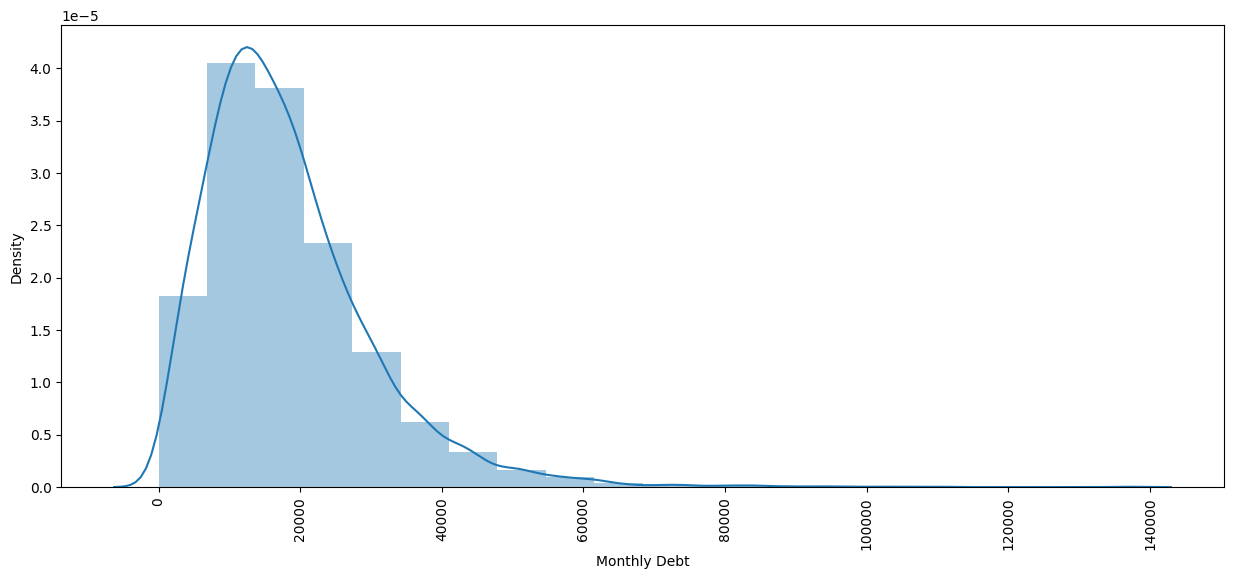

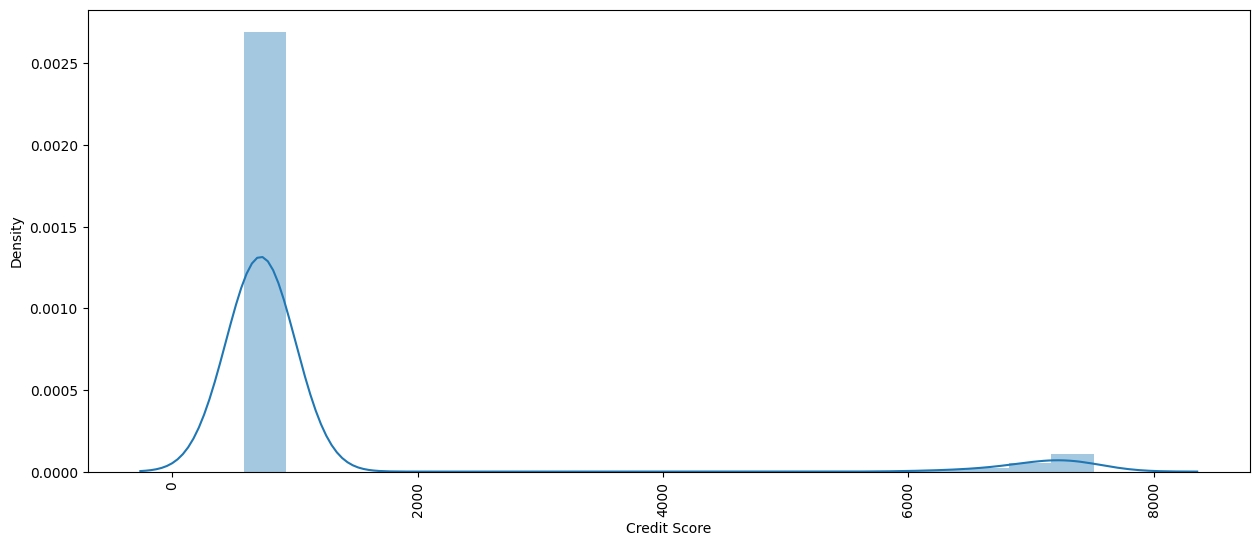

In [137]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

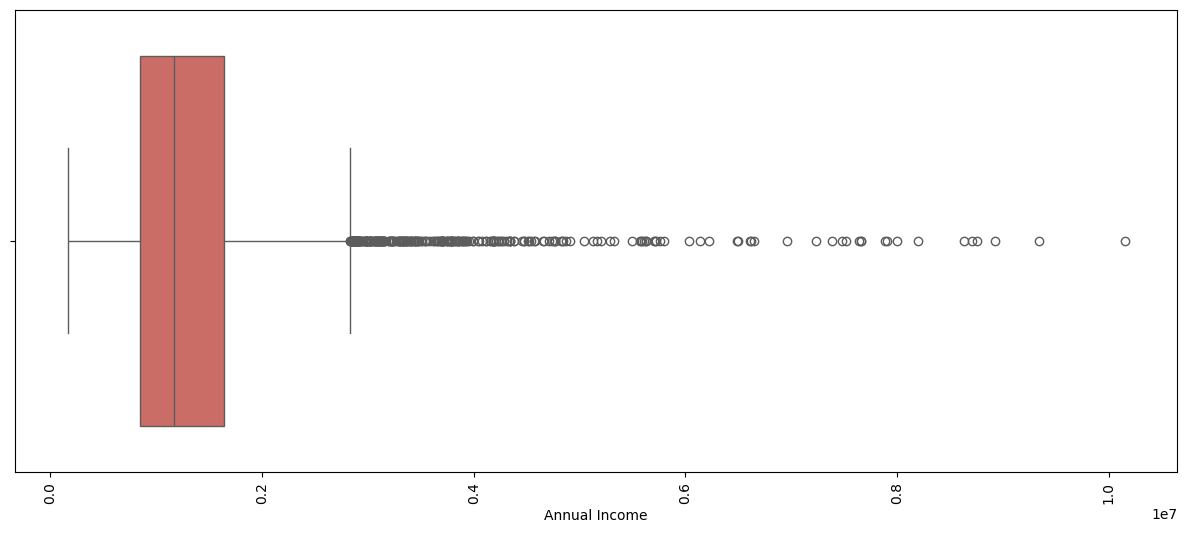

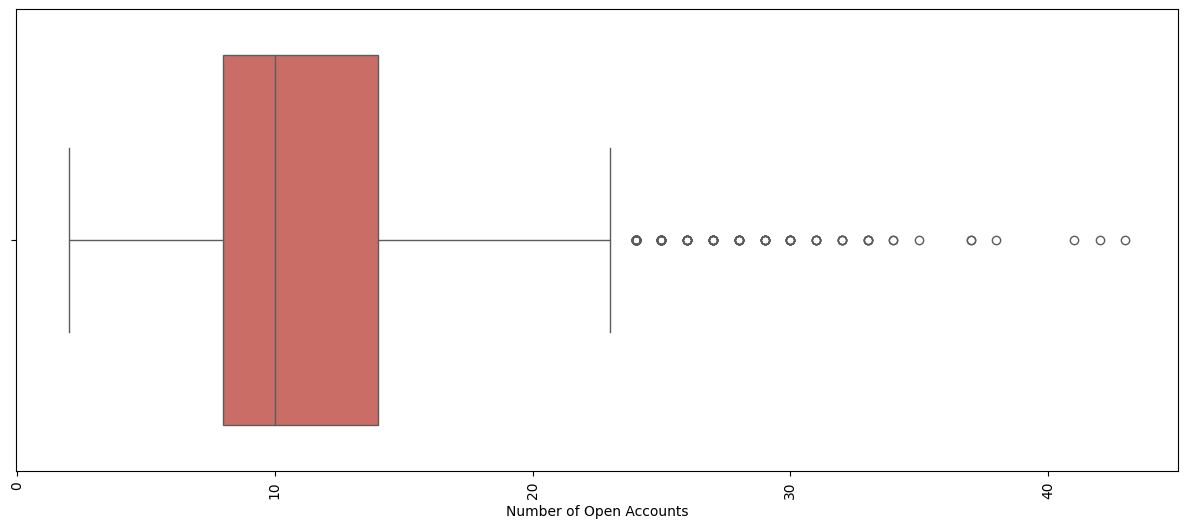

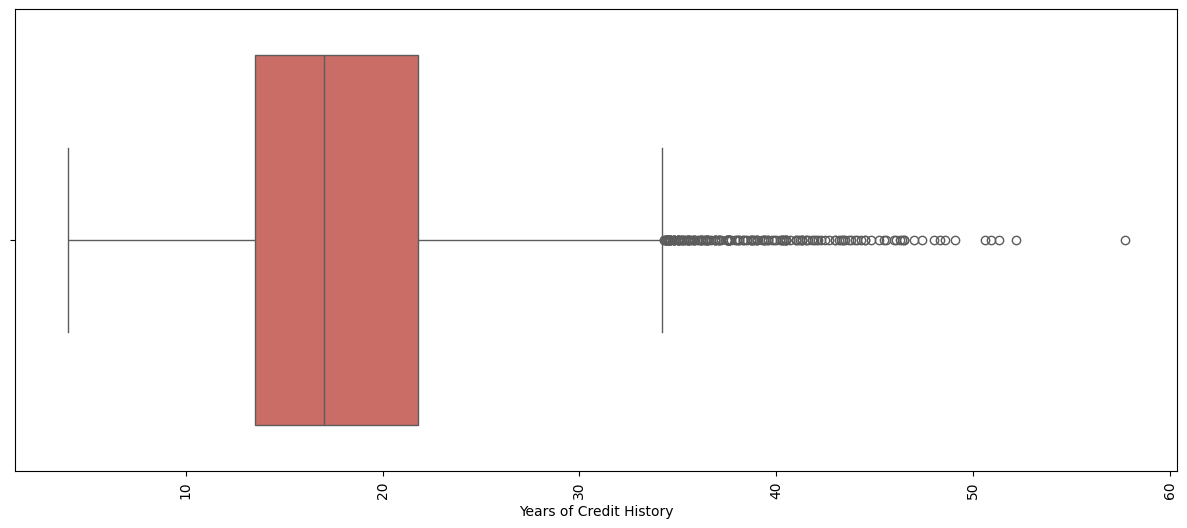

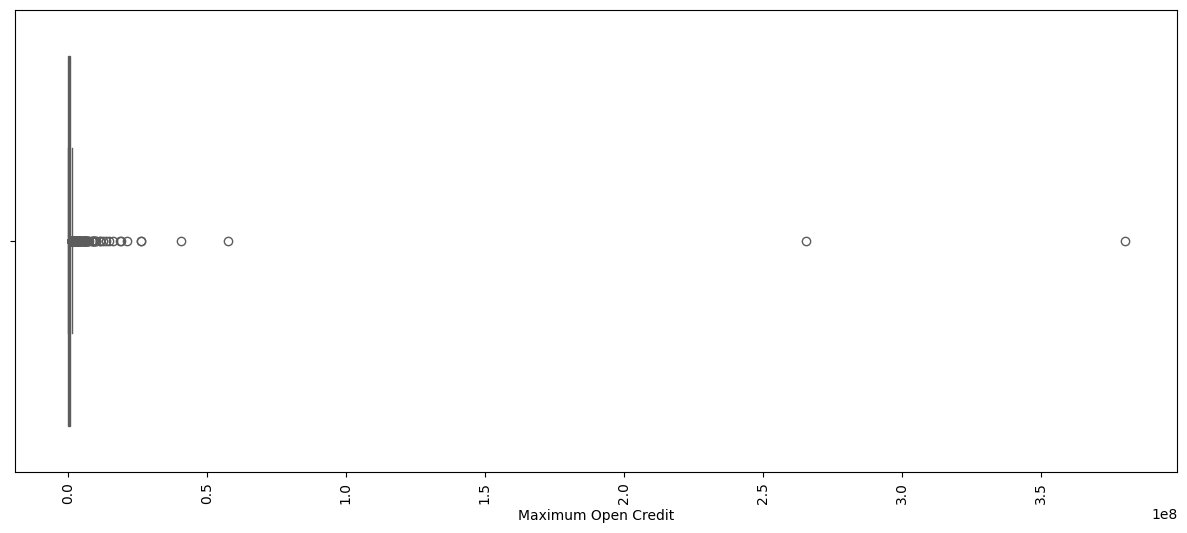

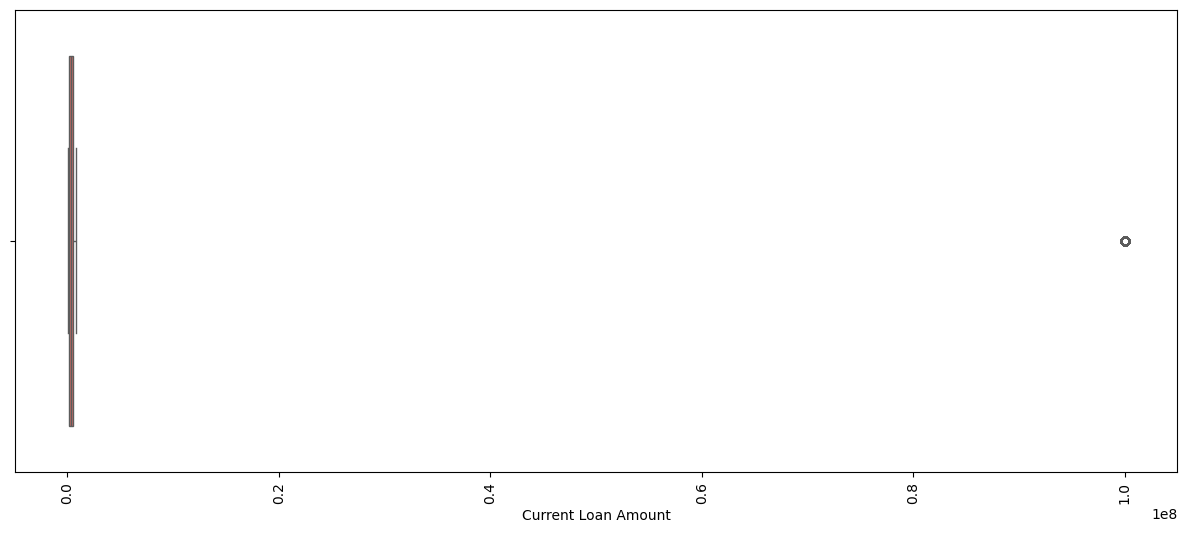

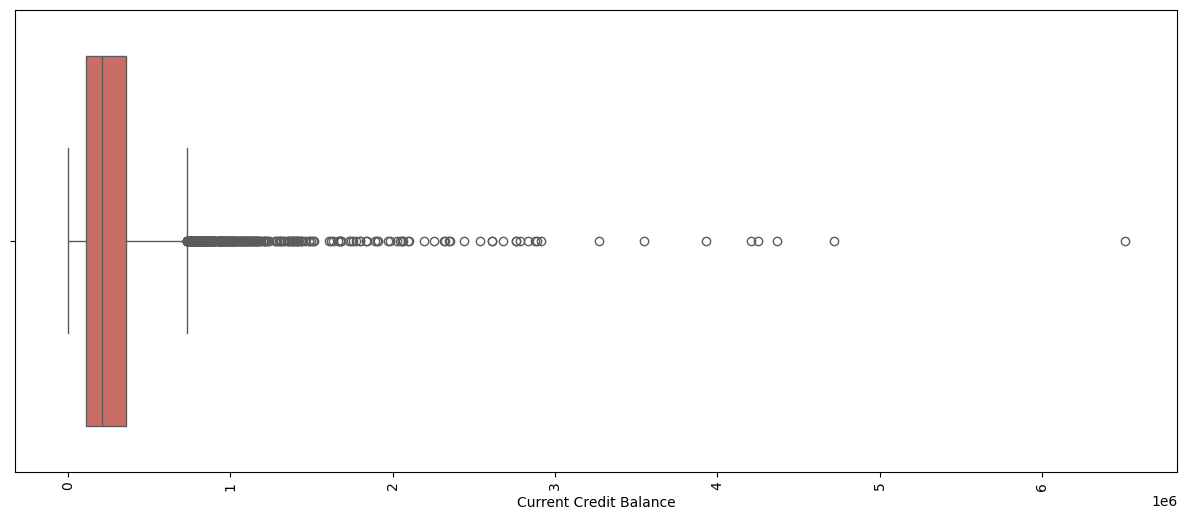

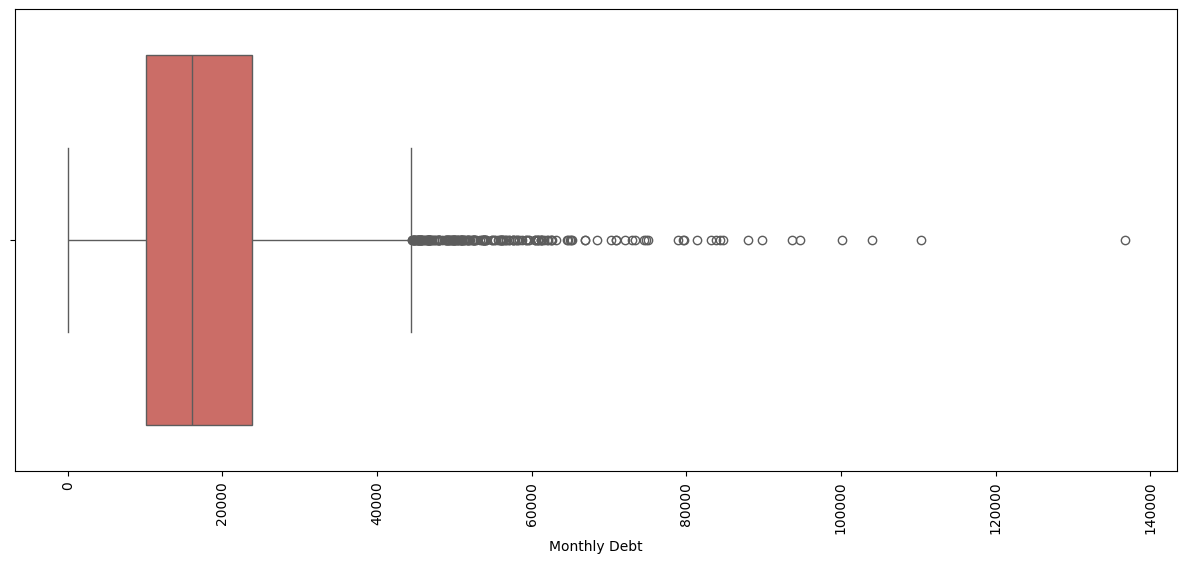

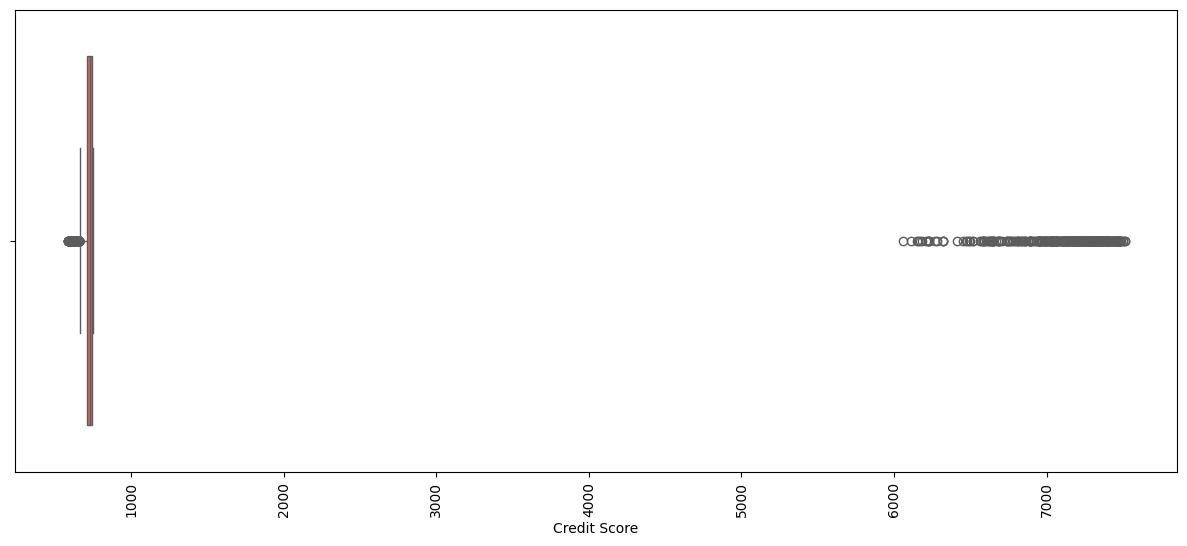

In [138]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

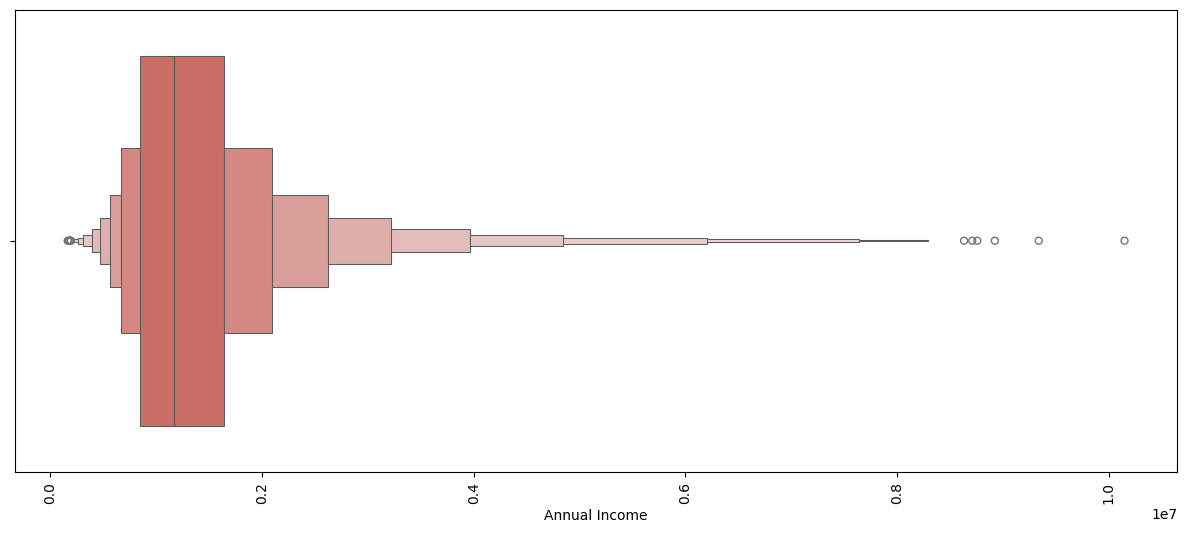

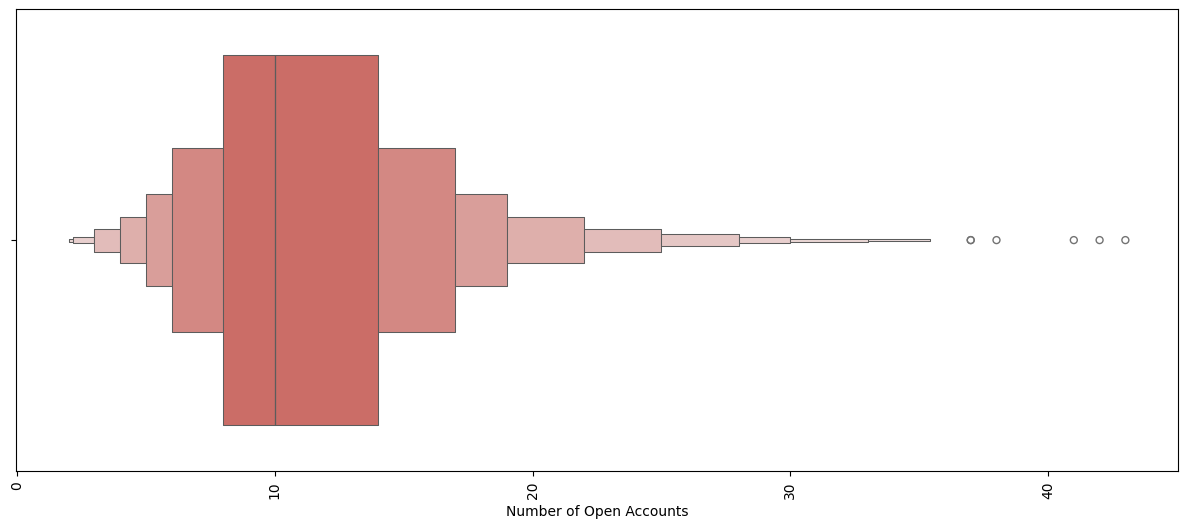

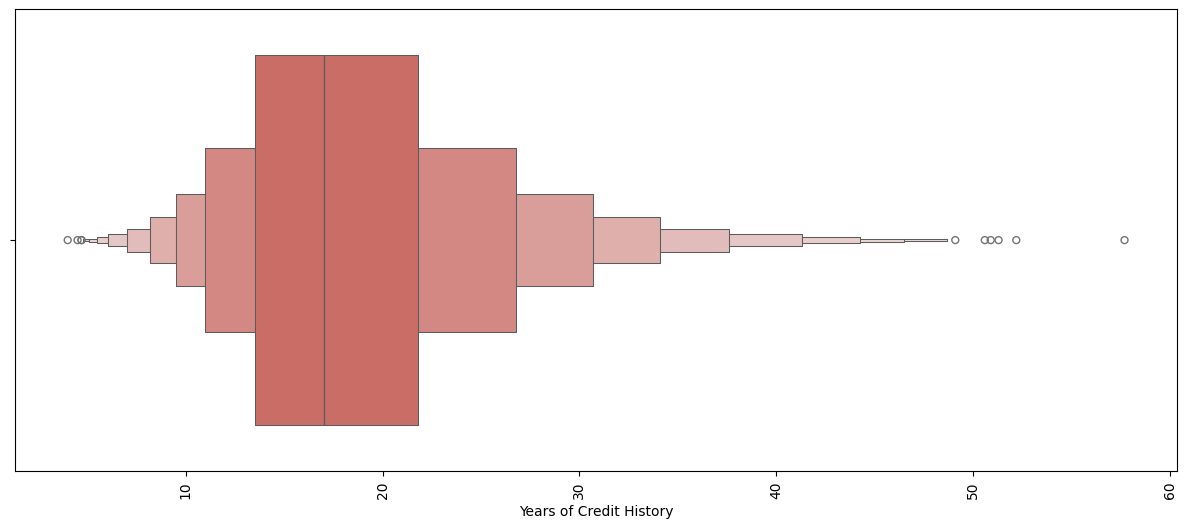

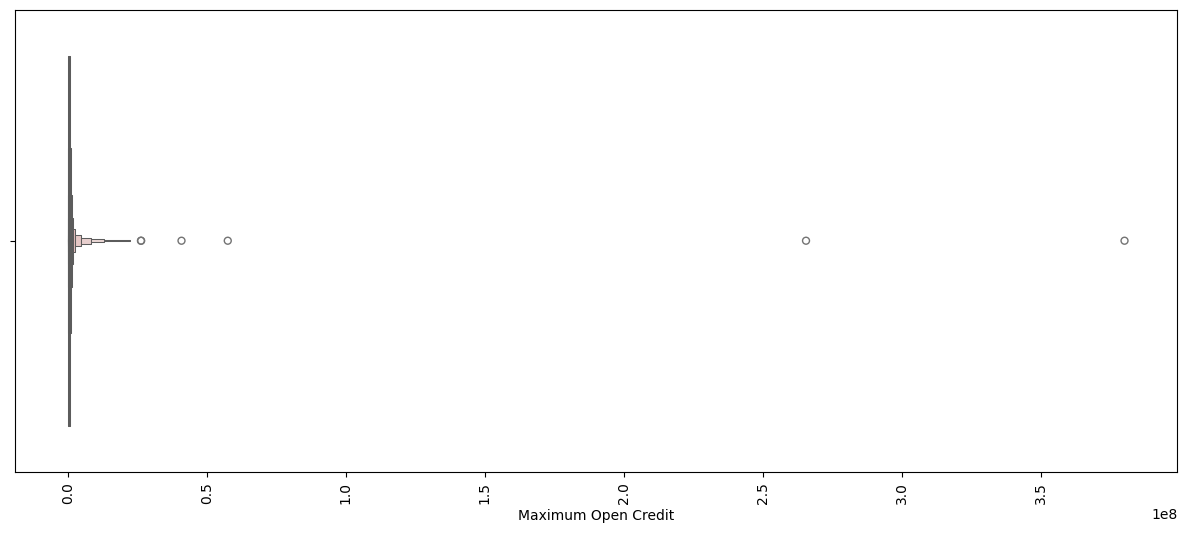

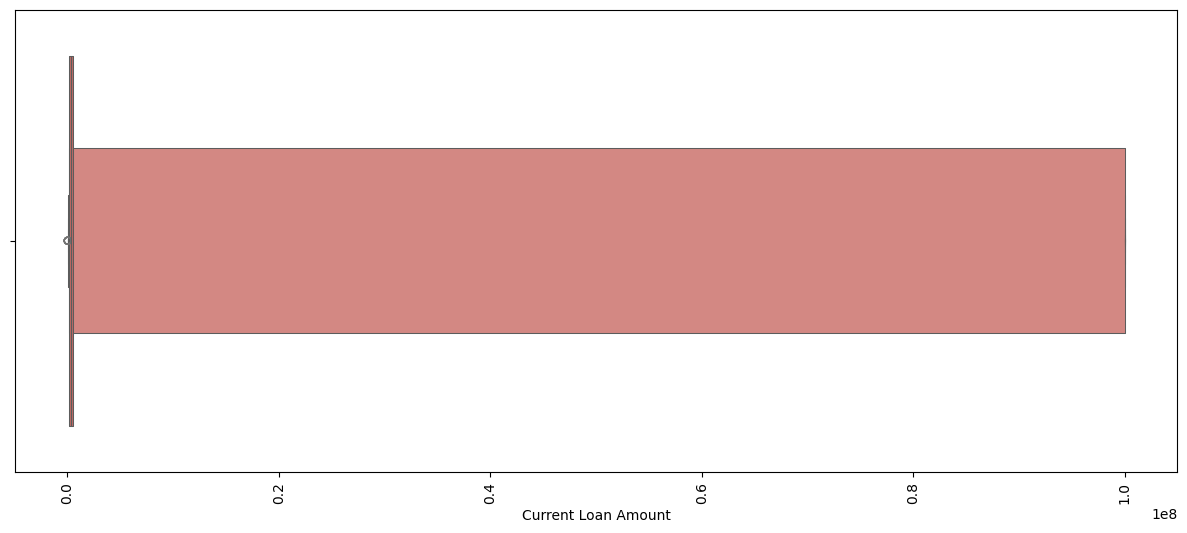

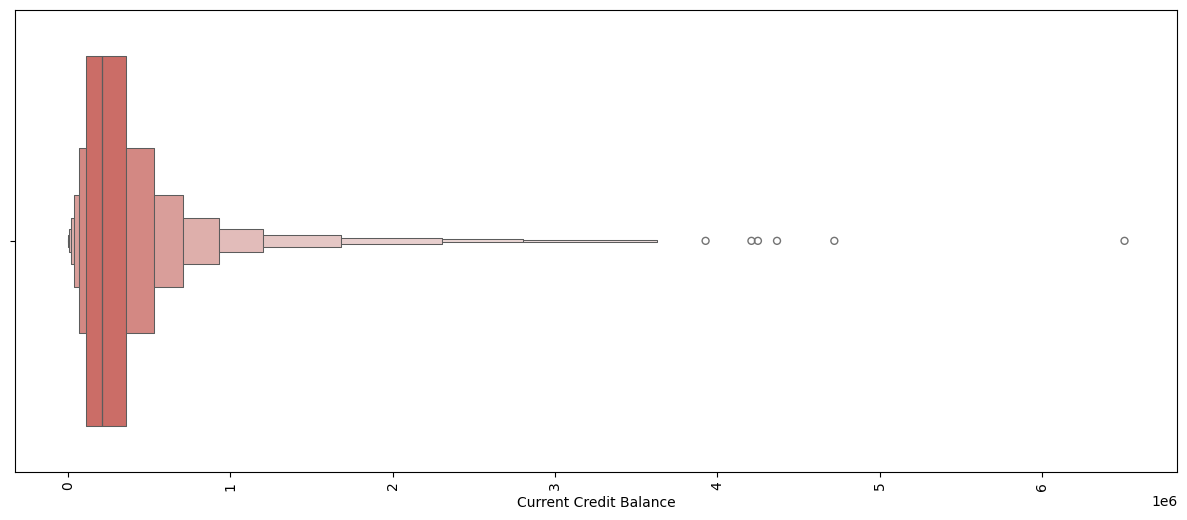

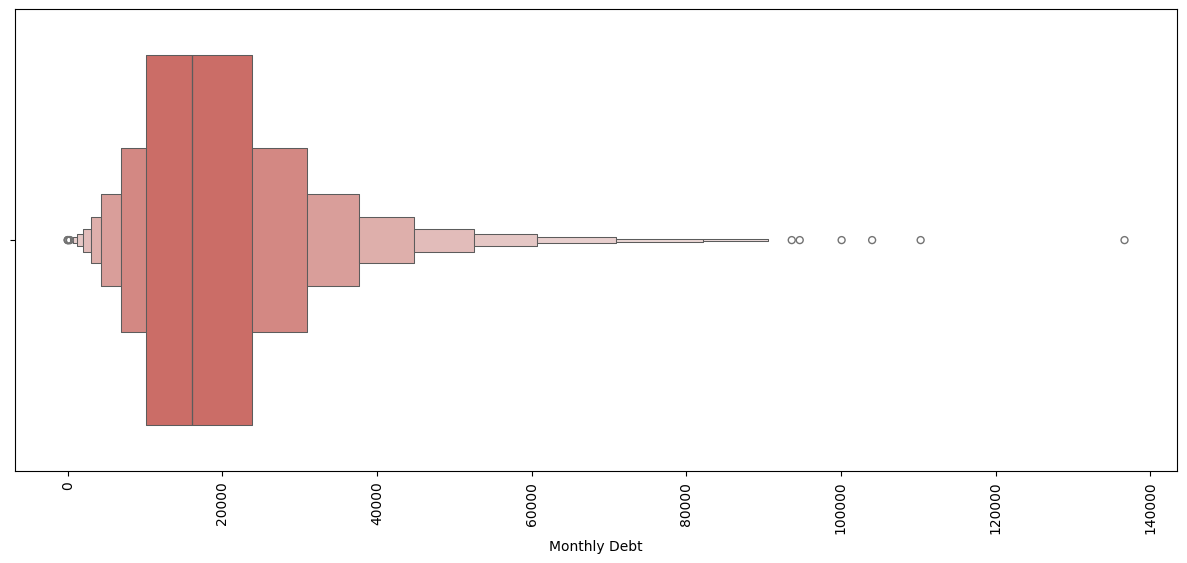

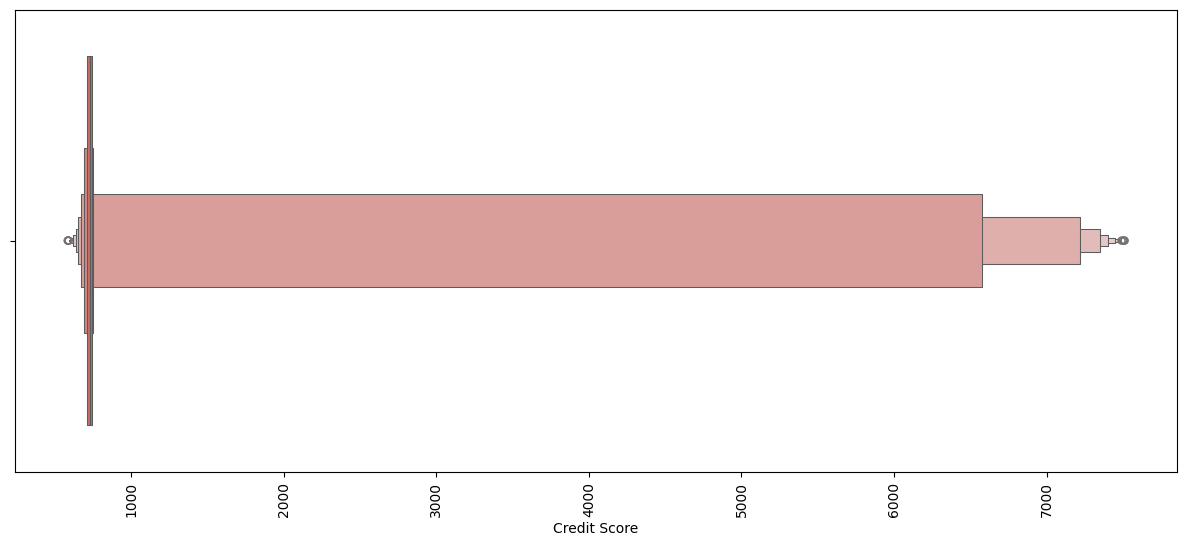

In [139]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

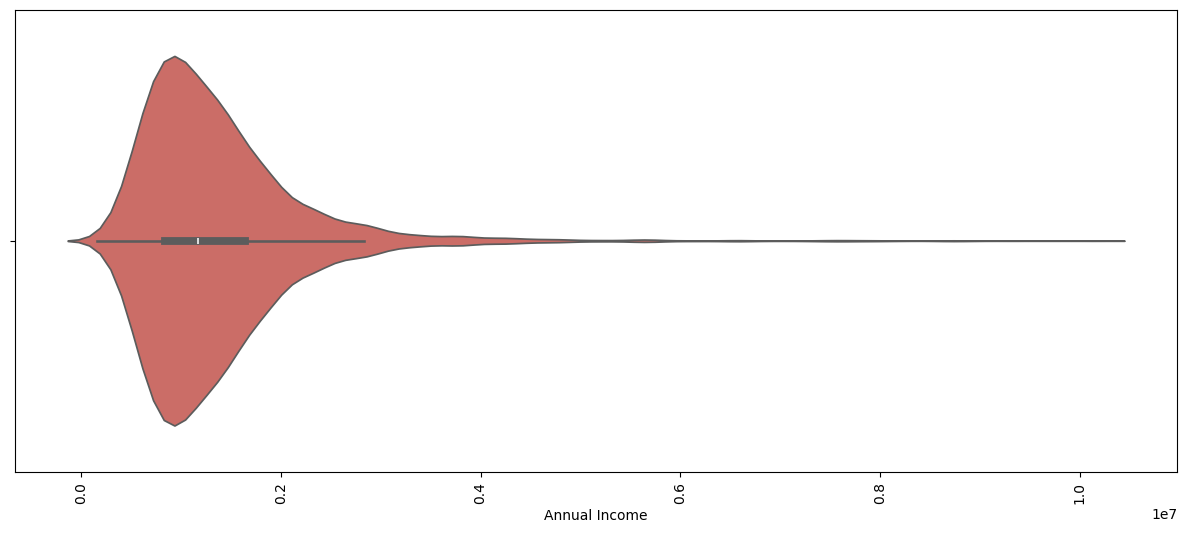

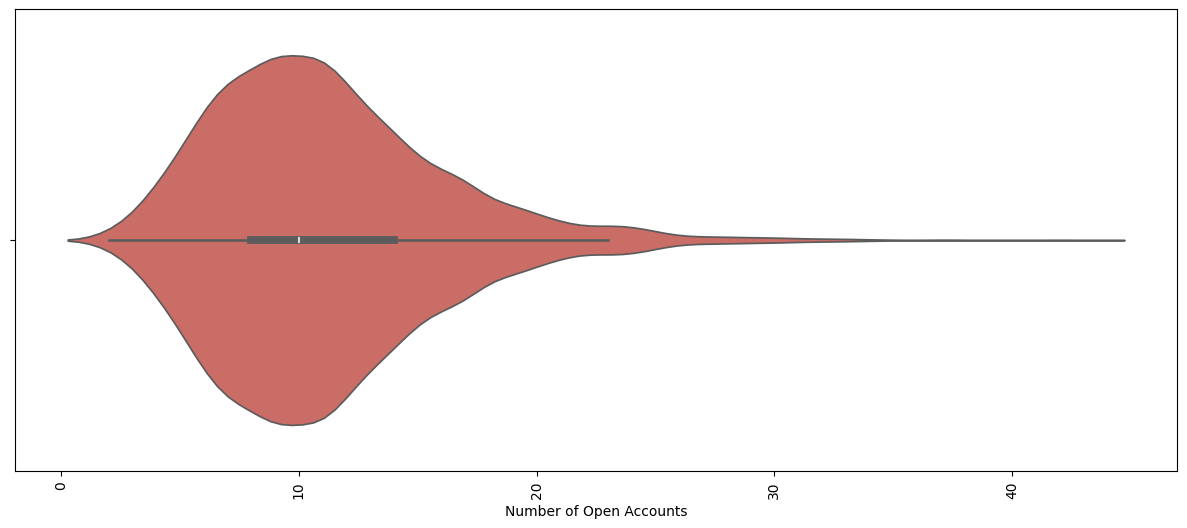

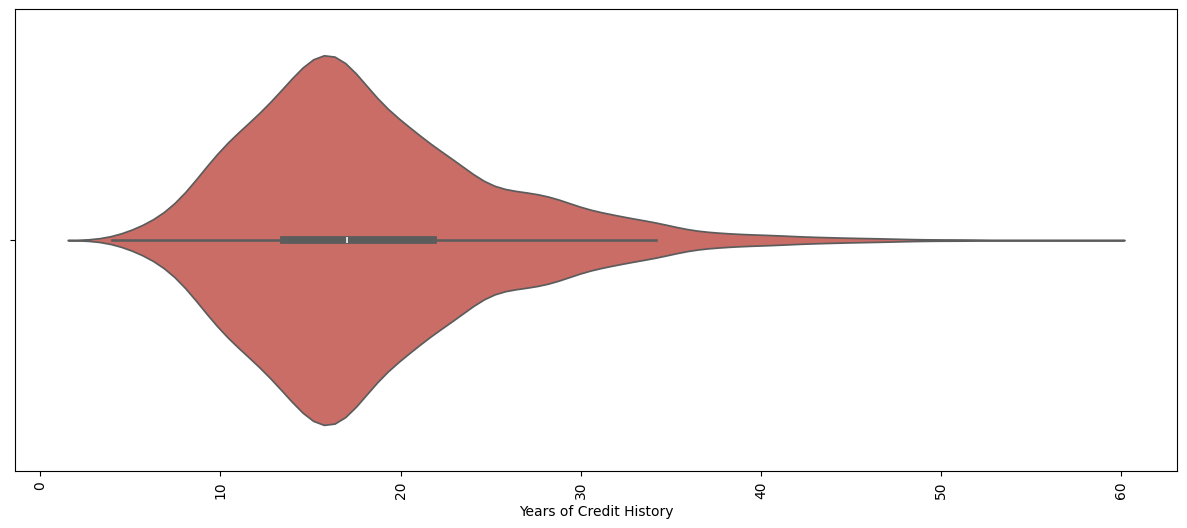

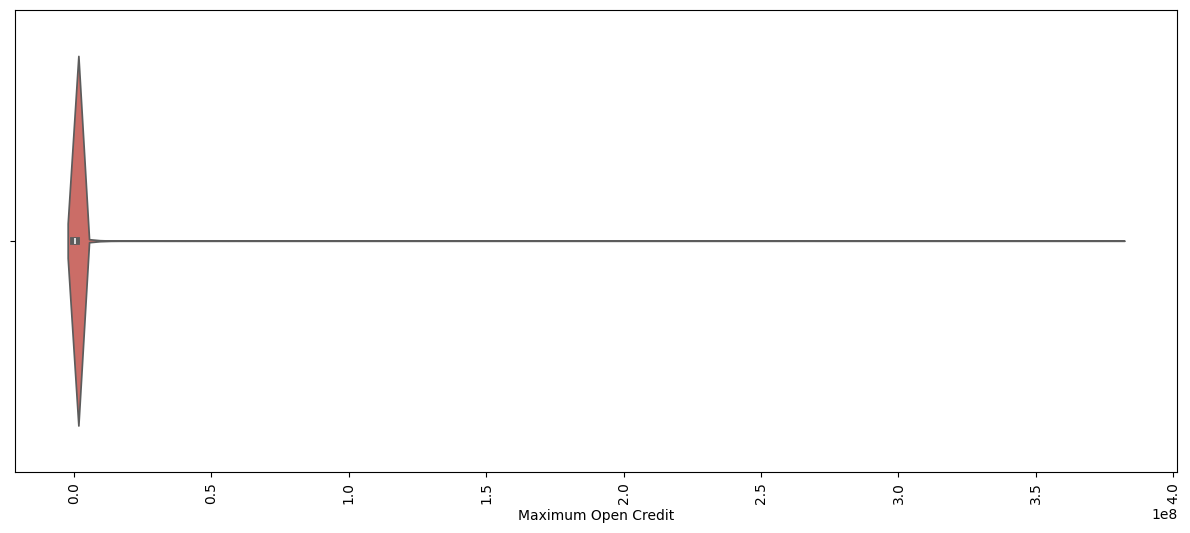

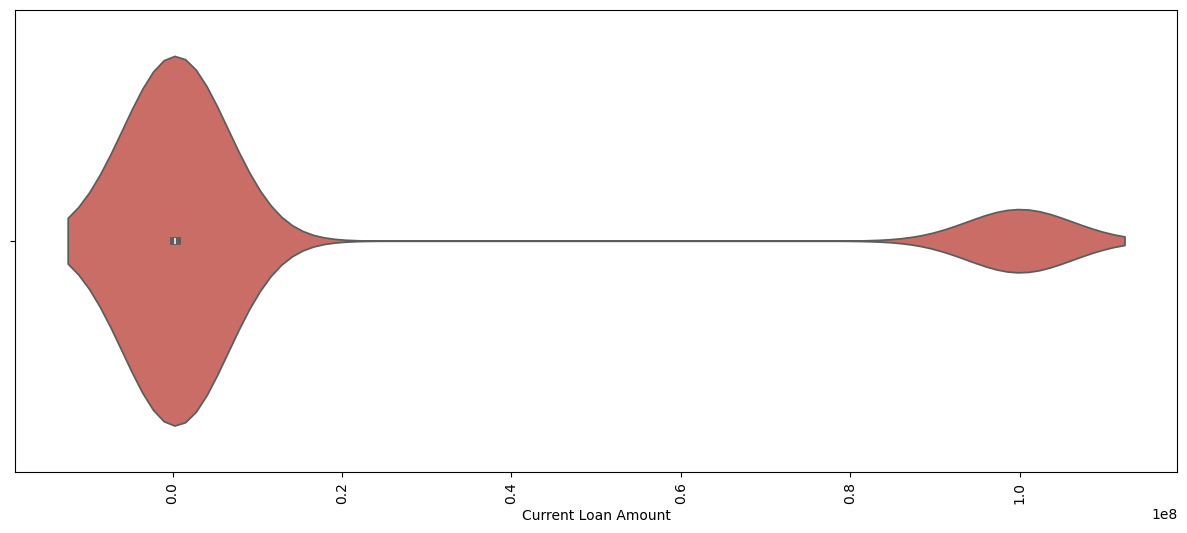

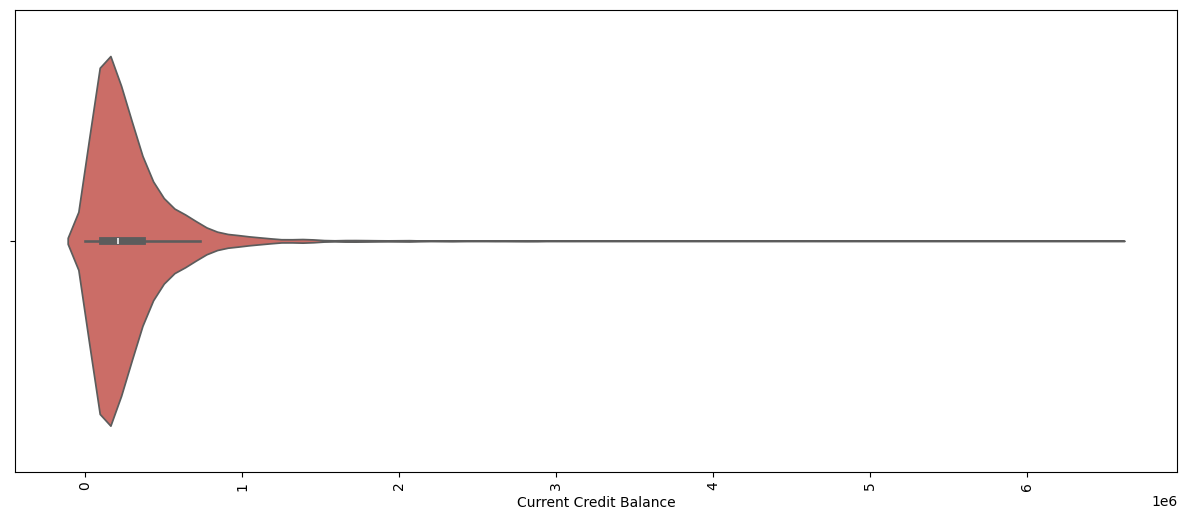

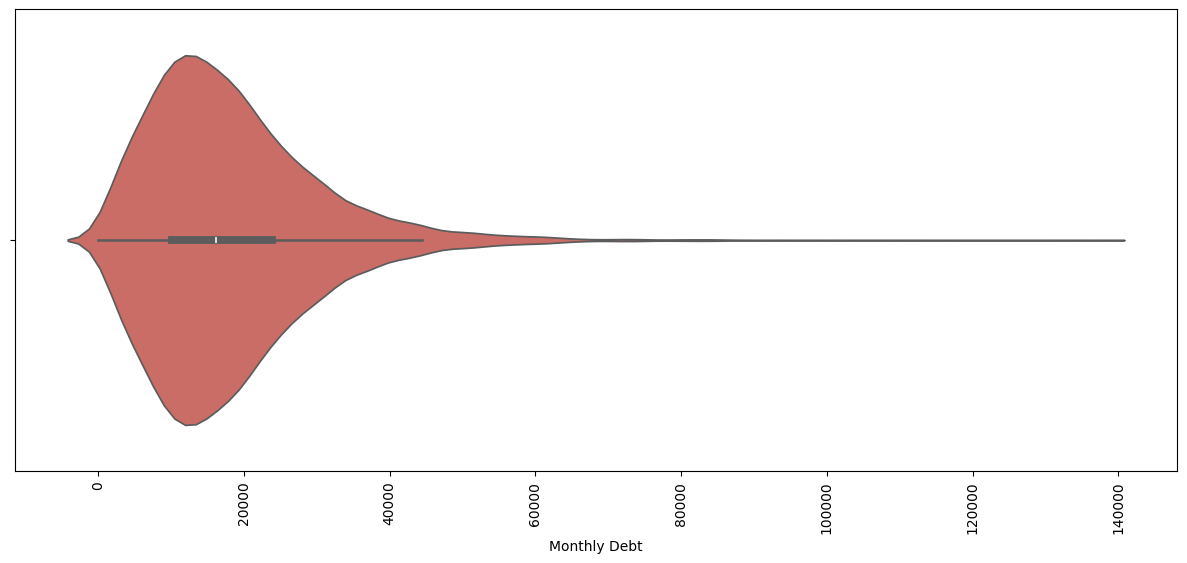

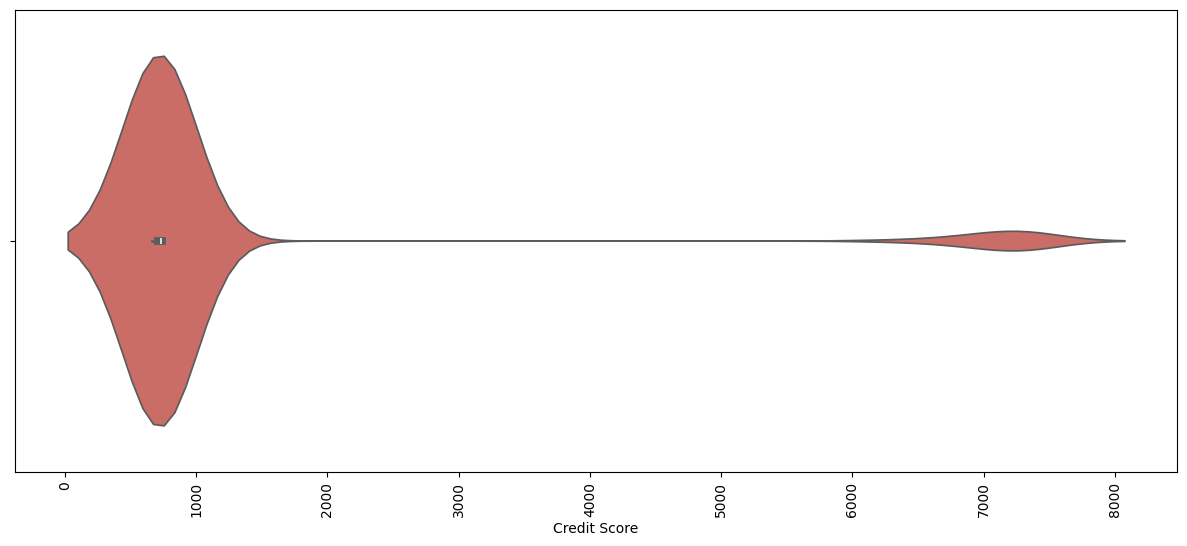

In [140]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

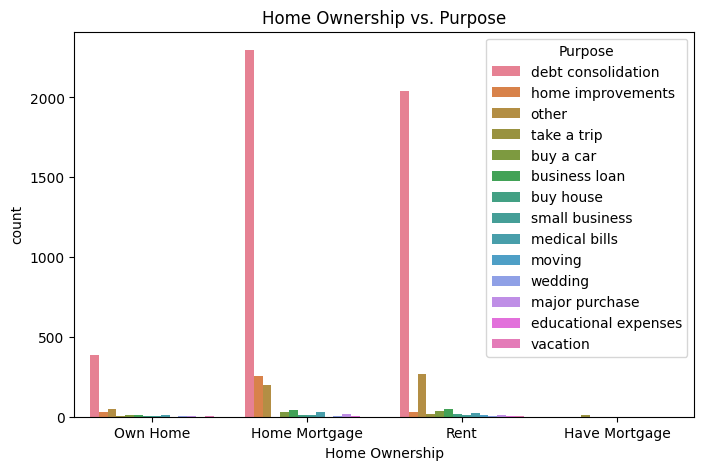

In [141]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Home Ownership', hue='Purpose', data=df)
plt.title("Home Ownership vs. Purpose")
plt.xticks(rotation=0)
plt.show()

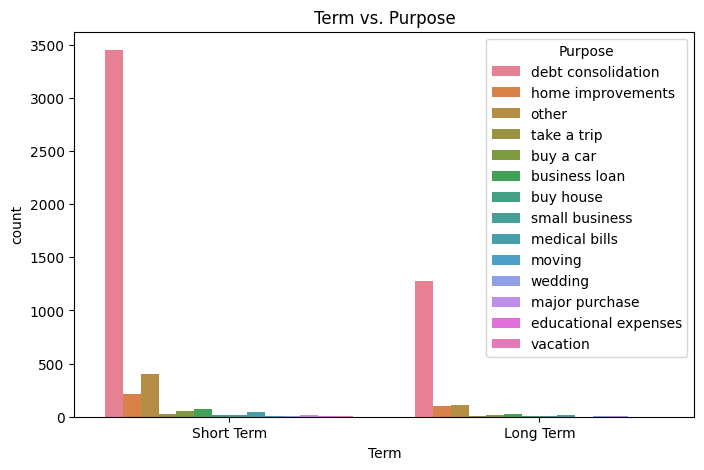

In [142]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Term', hue='Purpose', data=df)
plt.title("Term vs. Purpose")
plt.show()

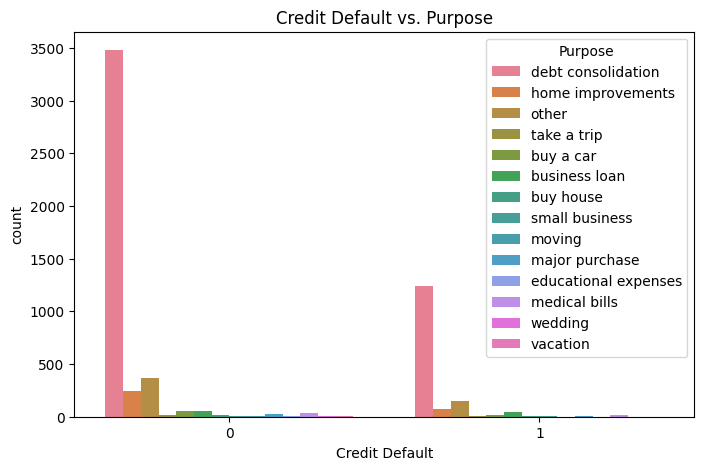

In [143]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Credit Default', hue='Purpose', data=df)
plt.title("Credit Default vs. Purpose")
plt.show()

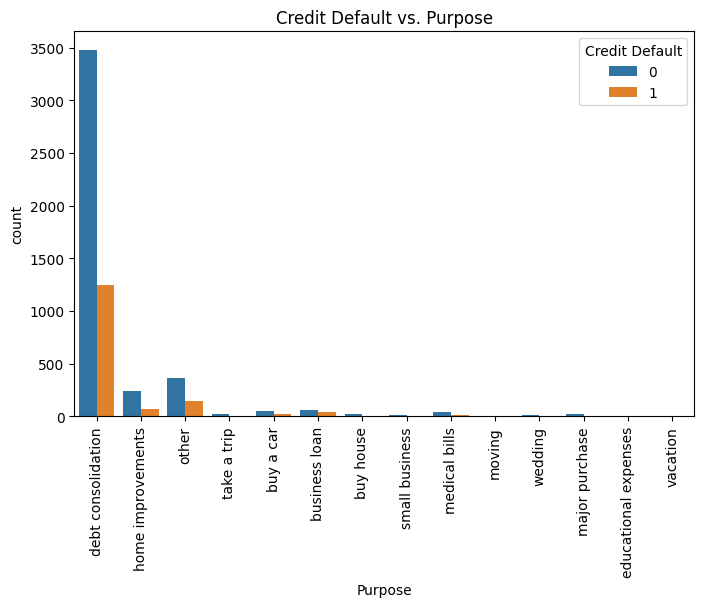

In [144]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Purpose', hue='Credit Default', data=df)
plt.title("Credit Default vs. Purpose")
plt.xticks(rotation=90)
plt.show()

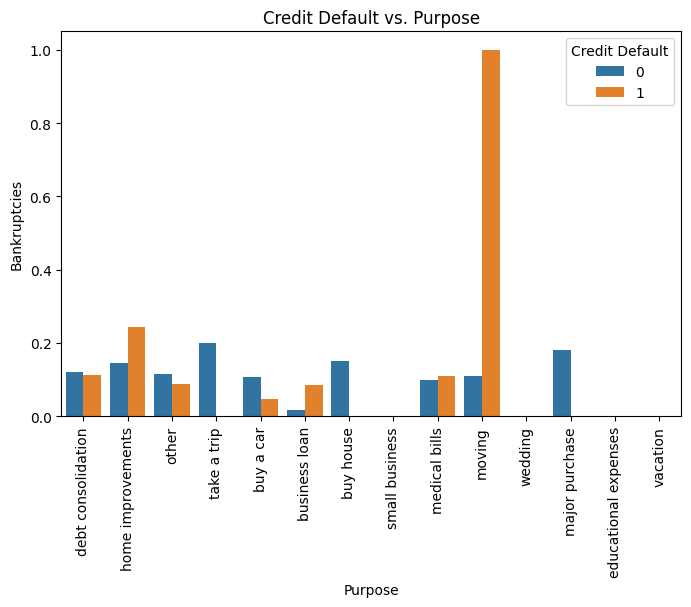

In [145]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Purpose', y = 'Bankruptcies',hue='Credit Default', ci = None, data=df)
plt.title("Credit Default vs. Purpose")
plt.xticks(rotation=90)
plt.show()

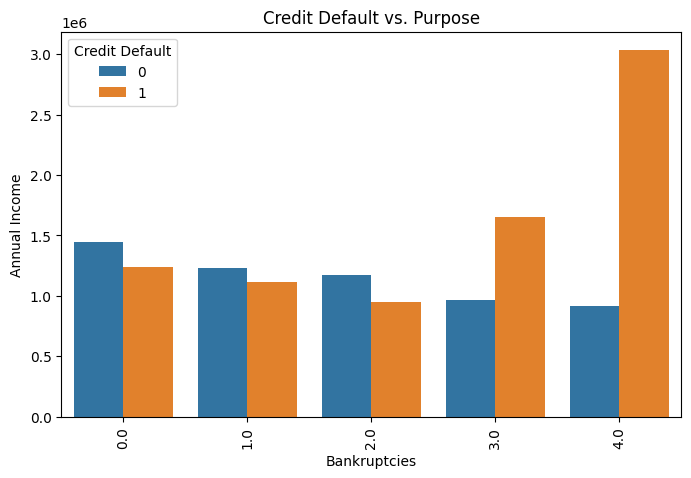

In [146]:
plt.figure(figsize=(8, 5))
sns.barplot(y ='Annual Income', x = 'Bankruptcies',hue='Credit Default', ci = None, data=df)
plt.title("Credit Default vs. Purpose")
plt.xticks(rotation=90)
plt.show()

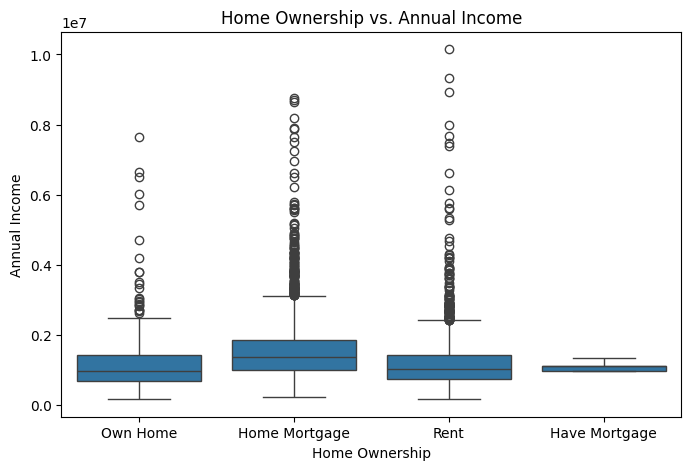

In [147]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Home Ownership', y='Annual Income', data=df)
plt.title("Home Ownership vs. Annual Income")
plt.show()

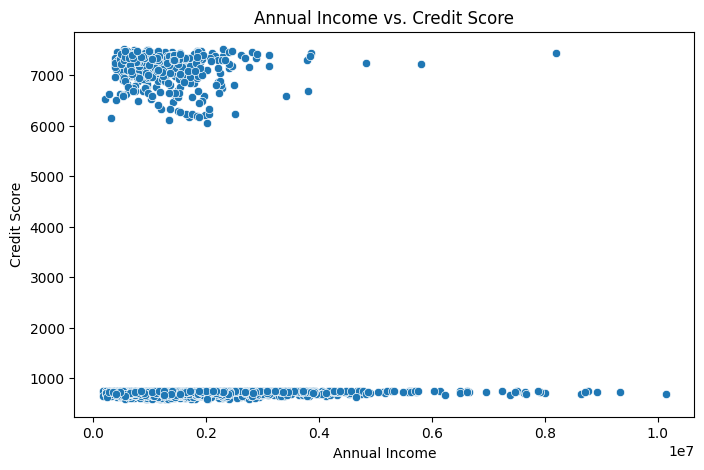

In [148]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income', y='Credit Score', data=df)
plt.title("Annual Income vs. Credit Score")
plt.show()

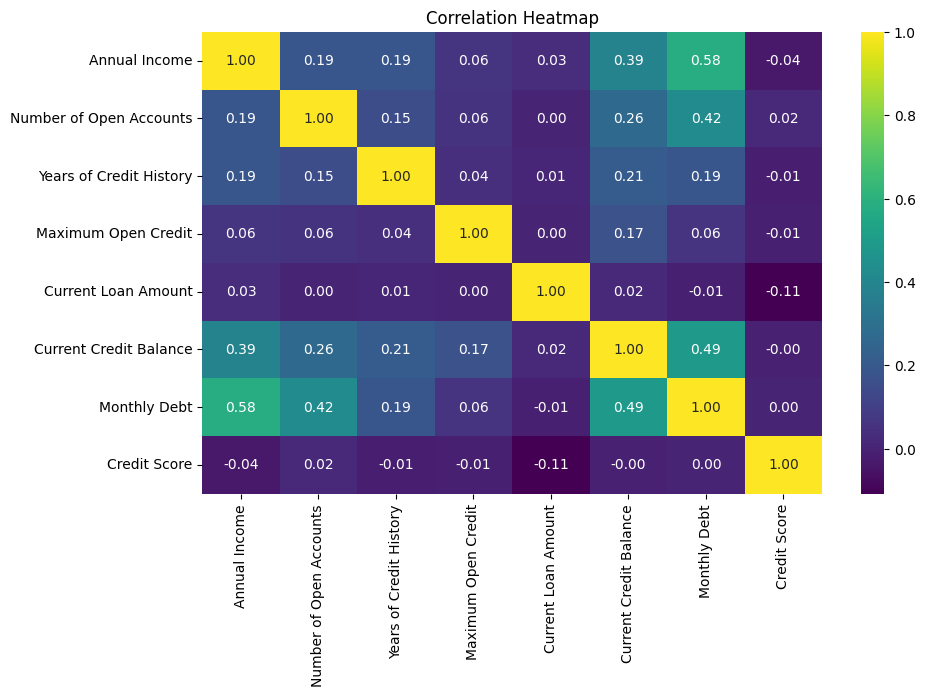

In [149]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[continuous].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [150]:
pivot_table1 = df.pivot_table(index='Home Ownership', columns='Purpose', values='Annual Income', aggfunc='mean')
print(pivot_table1)

Purpose         business loan     buy a car     buy house  debt consolidation  \
Home Ownership                                                                  
Have Mortgage             NaN           NaN           NaN                 NaN   
Home Mortgage    1.947543e+06  1.559949e+06  1.610989e+06        1.536415e+06   
Own Home         1.309168e+06  1.130560e+06  7.862865e+05        1.152278e+06   
Rent             1.314408e+06  1.072891e+06  2.001585e+06        1.171620e+06   

Purpose         educational expenses  home improvements  major purchase  \
Home Ownership                                                            
Have Mortgage                    NaN                NaN             NaN   
Home Mortgage              1430101.5       1.706404e+06    1.537503e+06   
Own Home                    369436.0       1.201931e+06    1.037888e+06   
Rent                       1977130.5       1.537849e+06    1.186502e+06   

Purpose         medical bills       moving         other  smal

In [151]:
pivot_table2 = df.pivot_table(index='Purpose', columns='Credit Default', values='Annual Income', aggfunc='sum')
print(pivot_table2)

Credit Default                   0             1
Purpose                                         
business loan         9.210964e+07  7.434713e+07
buy a car             7.772746e+07  2.018894e+07
buy house             3.605400e+07  9.650651e+06
debt consolidation    4.853494e+09  1.512819e+09
educational expenses  9.842722e+06  2.013810e+05
home improvements     4.308166e+08  8.754326e+07
major purchase        2.747140e+07  1.294284e+07
medical bills         7.149502e+07  2.140276e+07
moving                9.139228e+06  9.905650e+05
other                 5.040781e+08  1.700667e+08
small business        1.534075e+07  1.090152e+07
take a trip           2.447717e+07  6.660811e+06
vacation              5.489670e+06  2.400631e+06
wedding               1.779369e+07  7.351043e+06


In [152]:
pivot_table3 = df.pivot_table(index='Home Ownership', columns='Purpose', aggfunc='size')
print("\nPivot Table - Count of Loans by Home Ownership and Purpose:\n", pivot_table3)


Pivot Table - Count of Loans by Home Ownership and Purpose:
 Purpose         business loan  buy a car  buy house  debt consolidation  \
Home Ownership                                                            
Have Mortgage             NaN        NaN        NaN                 NaN   
Home Mortgage            45.0       30.0       10.0              2297.0   
Own Home                  9.0       12.0        2.0               389.0   
Rent                     51.0       35.0       14.0              2039.0   

Purpose         educational expenses  home improvements  major purchase  \
Home Ownership                                                            
Have Mortgage                    NaN                NaN             NaN   
Home Mortgage                    4.0              254.0            15.0   
Own Home                         1.0               31.0             3.0   
Rent                             2.0               31.0            12.0   

Purpose         medical bills  movin

In [153]:
pivot_table4 = df.pivot_table(index=['Home Ownership', 'Purpose'], values=['Annual Income', 'Credit Score'], aggfunc='mean')
print("\nMulti-Level Pivot Table - Mean Annual Income & Credit Score:\n", pivot_table4)


Multi-Level Pivot Table - Mean Annual Income & Credit Score:
                                      Annual Income  Credit Score
Home Ownership Purpose                                          
Have Mortgage  take a trip            1.093329e+06    708.875000
Home Mortgage  business loan          1.947543e+06    991.088889
               buy a car              1.559949e+06    962.366667
               buy house              1.610989e+06   1313.900000
               debt consolidation     1.536415e+06   1117.206356
               educational expenses   1.430102e+06    710.000000
               home improvements      1.706404e+06    948.625984
               major purchase         1.537503e+06    704.000000
               medical bills          1.692277e+06    947.928571
               moving                 7.496830e+05    715.000000
               other                  1.532914e+06   1194.949495
               small business         1.851833e+06   1991.111111
               vacation    

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [155]:
features = ['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
            'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit',
            'Number of Credit Problems', 'Bankruptcies',
            'Purpose', 'Term', 'Current Loan Amount', 'Current Credit Balance',
            'Monthly Debt', 'Credit Score']
target = 'Credit Default' 

In [156]:
categorical_features = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']
numerical_features = ['Annual Income', 'Number of Open Accounts',
                      'Years of Credit History', 'Maximum Open Credit', 'Current Loan Amount', 'Current Credit Balance',
                      'Monthly Debt', 'Credit Score']

In [161]:
encoder = OneHotEncoder(drop='first', sparse_output=False) 
encoded_categorical = encoder.fit_transform(df[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

In [162]:
encoded_categorical_df

,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,...,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Short Term
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5926,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5927,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5928,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5929,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_features])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features)

In [165]:
scaled_numerical_df.shape

(5931, 8)

In [166]:
df1 = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)
df1.shape

(5931, 35)

In [167]:
df1

,Annual Income,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Home Ownership_Home Mortgage,Home Ownership_Own Home,...,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Short Term
0,-1.048068,-0.026703,1.134249,-0.019056,2.416753,-0.758450,-0.874828,-0.249780,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.405106,0.789677,-0.427733,0.061402,-0.415098,0.323362,0.005673,-0.257280,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.729397,-0.026703,2.369635,0.061516,2.416753,0.053885,-0.391853,-0.254155,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.665910,-0.638989,0.594655,-0.106458,-0.419175,-0.607597,-0.586575,-0.284155,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.699992,0.381487,-0.669131,-0.067763,-0.419048,-0.615521,-0.936620,-0.268530,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5926,1.733797,1.401963,0.424257,-0.084911,-0.410202,-0.567031,3.606893,-0.277905,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5927,-0.130454,0.585582,-0.257335,0.002937,-0.409900,-0.384836,0.779257,-0.295405,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5928,-1.142601,-1.659464,-1.393322,-0.112874,-0.418948,-0.677199,-1.381122,-0.282280,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5929,0.196557,-0.230799,1.162649,-0.018999,-0.410013,0.514545,-0.464927,3.913335,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
df.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems', 'Bankruptcies',
       'Purpose', 'Term', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default'],
      dtype='object')

In [169]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [170]:
df1.shape

(5931, 35)

In [171]:
df1.isnull().sum()

Annual Income                     0
Number of Open Accounts           0
Years of Credit History           0
Maximum Open Credit               0
Current Loan Amount               0
Current Credit Balance            0
Monthly Debt                      0
Credit Score                      0
Home Ownership_Home Mortgage      0
Home Ownership_Own Home           0
Home Ownership_Rent               0
Years in current job_10+ years    0
Years in current job_2 years      0
Years in current job_3 years      0
Years in current job_4 years      0
Years in current job_5 years      0
Years in current job_6 years      0
Years in current job_7 years      0
Years in current job_8 years      0
Years in current job_9 years      0
Years in current job_< 1 year     0
Purpose_buy a car                 0
Purpose_buy house                 0
Purpose_debt consolidation        0
Purpose_educational expenses      0
Purpose_home improvements         0
Purpose_major purchase            0
Purpose_medical bills       

In [172]:
discrete

['Tax Liens', 'Number of Credit Problems', 'Bankruptcies', 'Credit Default']

In [173]:
df5 = df[['Tax Liens', 'Number of Credit Problems', 'Bankruptcies', 'Credit Default']]
df5

,Tax Liens,Number of Credit Problems,Bankruptcies,Credit Default
0,0,1,1.0,0
1,0,0,0.0,1
2,0,0,0.0,0
3,0,1,1.0,0
4,0,1,0.0,0
...,...,...,...,...
7491,0,0,0.0,0
7493,0,0,0.0,1
7495,0,0,0.0,0
7496,0,0,0.0,1


In [174]:
df5 = df5.reset_index()
df5

,index,Tax Liens,Number of Credit Problems,Bankruptcies,Credit Default
0,0,0,1,1.0,0
1,1,0,0,0.0,1
2,2,0,0,0.0,0
3,3,0,1,1.0,0
4,4,0,1,0.0,0
...,...,...,...,...,...
5926,7491,0,0,0.0,0
5927,7493,0,0,0.0,1
5928,7495,0,0,0.0,0
5929,7496,0,0,0.0,1


In [175]:
df_processed = pd.concat([df1, df5], axis=1)
df_processed

,Annual Income,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Home Ownership_Home Mortgage,Home Ownership_Own Home,...,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Short Term,index,Tax Liens,Number of Credit Problems,Bankruptcies,Credit Default
0,-1.048068,-0.026703,1.134249,-0.019056,2.416753,-0.758450,-0.874828,-0.249780,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0,0,1,1.0,0
1,-0.405106,0.789677,-0.427733,0.061402,-0.415098,0.323362,0.005673,-0.257280,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0.0,1
2,-0.729397,-0.026703,2.369635,0.061516,2.416753,0.053885,-0.391853,-0.254155,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2,0,0,0.0,0
3,-0.665910,-0.638989,0.594655,-0.106458,-0.419175,-0.607597,-0.586575,-0.284155,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,3,0,1,1.0,0
4,-0.699992,0.381487,-0.669131,-0.067763,-0.419048,-0.615521,-0.936620,-0.268530,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4,0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5926,1.733797,1.401963,0.424257,-0.084911,-0.410202,-0.567031,3.606893,-0.277905,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,7491,0,0,0.0,0
5927,-0.130454,0.585582,-0.257335,0.002937,-0.409900,-0.384836,0.779257,-0.295405,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7493,0,0,0.0,1
5928,-1.142601,-1.659464,-1.393322,-0.112874,-0.418948,-0.677199,-1.381122,-0.282280,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,7495,0,0,0.0,0
5929,0.196557,-0.230799,1.162649,-0.018999,-0.410013,0.514545,-0.464927,3.913335,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7496,0,0,0.0,1


In [176]:
X = df_processed.drop('Credit Default', axis = 1)
y = df_processed['Credit Default']

In [177]:
df_processed['Credit Default'].value_counts()

Credit Default
0    4351
1    1580
Name: count, dtype: int64

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [180]:
y_train = y_train.astype(int)

In [182]:
from imblearn.over_sampling import SMOTE

In [183]:
smote = SMOTE(random_state=42) 

In [184]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [185]:
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [186]:
y_test = y_test.astype(int)

In [187]:
y_pred = log_reg.predict(X_test)

In [188]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7346251053074979

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       871
           1       0.50      0.56      0.53       316

    accuracy                           0.73      1187
   macro avg       0.67      0.68      0.67      1187
weighted avg       0.75      0.73      0.74      1187



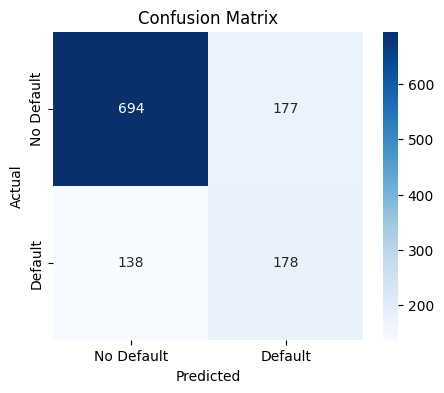

In [189]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [190]:
from sklearn.tree import DecisionTreeClassifier

In [191]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [192]:
y_pred = dt_classifier.predict(X_test)

In [193]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7346251053074979

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       871
           1       0.50      0.54      0.52       316

    accuracy                           0.73      1187
   macro avg       0.67      0.67      0.67      1187
weighted avg       0.74      0.73      0.74      1187

